In [1]:
# python dependences:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
import numpy as np

import healpy as hp
import pickle

import pandas as pd
from collections import OrderedDict

import yaml

import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')
matplotlib.rcParams.update({'font.size': 15})

/tmp/ipykernel_1607225/470635682.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('plasma')


In [3]:
import sys
sys.path.insert(0, '/global/homes/q/qhang/desc/notebooks_for_analysis/')
import spatial_var_functions as svf
import measure_properties_with_systematics as mp

## 1. Depth map

In [2]:
# plot the map 
root="/pscratch/sd/q/qhang/glass_mock/catalog_info/mask/"
mask = hp.read_map(root+"wfd_footprint_nvisitcut_500_nside_128-ebv-0.2.fits")

depth_map={}
for year in [1,3,5]:
    nights=int(year*365)
    root = f"/pscratch/sd/q/qhang/rubin_baseline_v3.3/MAF-{year}year/"
    usemap=hp.read_map(root + f"baseline_v3_3_10yrs_ExgalM5_i_and_nightlt{nights}_HEAL.fits")
    usemap*=mask
    usemap[mask==0]=np.nan
    depth_map[year]=usemap

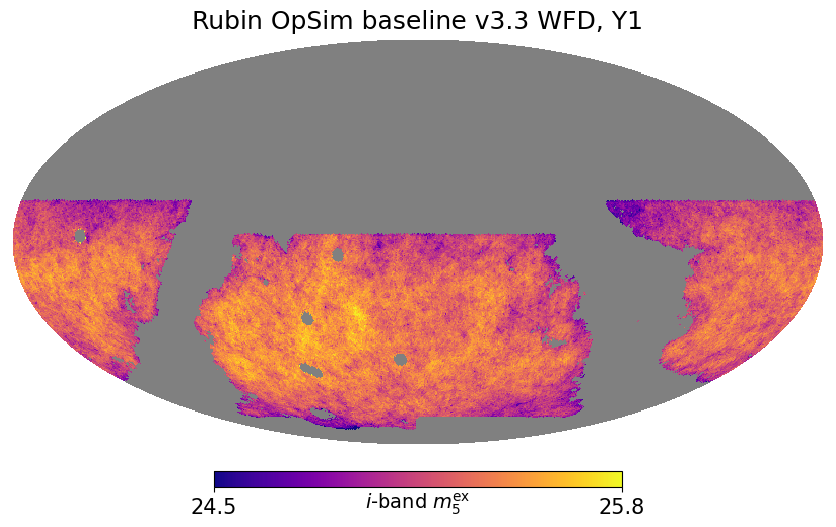

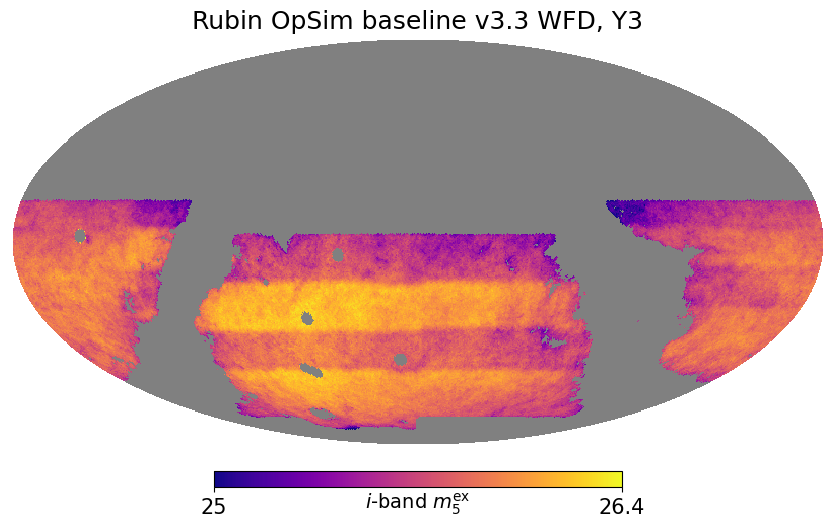

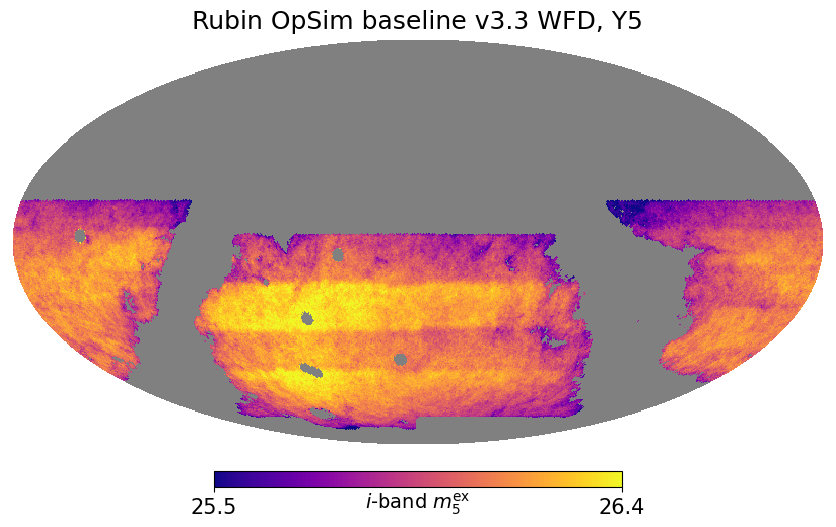

In [3]:
vmax=[25.8, 26.4, 26.4]
vmin=[24.6, 25.1, 25.6]
title=['Rubin OpSim baseline v3.3 WFD, Y1', 
      'Rubin OpSim baseline v3.3 WFD, Y3',
      'Rubin OpSim baseline v3.3 WFD, Y5',]
for ii, year in enumerate([1,3,5]):
    hp.mollview(depth_map[year], title=title[ii], unit="$i$-band $m_5^{\\rm ex}$", 
                max=vmax[ii], min=vmin[ii]-0.1, cmap=cmap)
    plt.savefig(f"plots/baselinev3.3-ExgalM5-i-wfd-y{year}.png",bbox_inches="tight")

In [4]:
# plot the map 
root="/pscratch/sd/q/qhang/glass_mock/catalog_info/mask/"
mask = hp.read_map(root+"wfd_footprint_nvisitcut_500_nside_128-ebv-0.2.fits")

depth_map={}
seeing_map={}
airmass_map={}
for band in "ugrizy":
    depth_map[band]={}
    seeing_map[band]={}
    airmass_map[band]={}
    for year in [1,3,5]:
        nights=int(year*365)
        root = f"/pscratch/sd/q/qhang/rubin_baseline_v3.3/MAF-{year}year/"
        
        usemap=hp.read_map(root + f"baseline_v3_3_10yrs_ExgalM5_{band}_and_nightlt{nights}_HEAL.fits")
        depth_map[band][year]=usemap[mask.astype(bool)]
        
        usemap=hp.read_map(root + f"baseline_v3_3_10yrs_Median_seeingFwhmEff_{band}_and_nightlt{nights}_HEAL.fits")
        seeing_map[band][year]=usemap[mask.astype(bool)]

        usemap=hp.read_map(root + f"baseline_v3_3_10yrs_Median_airmass_{band}_and_nightlt{nights}_HEAL.fits")
        airmass_map[band][year]=usemap[mask.astype(bool)]
        

In [5]:
# get bins for depth:
bins_depth=[]
for ii, band in enumerate(["u","g","r","i","z","y"]):
    array = depth_map[band][1]
    dmin = array[~np.isnan(array)].min()
    dmax = depth_map[band][5].max()
    bins_depth.append([dmin,dmax])
    
bins_depth

[[21.10123122980525, 25.519247510549715],
 [22.905649565588053, 27.273075094158152],
 [24.44348961274953, 27.182688286639497],
 [24.116478554688236, 27.00752537690018],
 [22.637472251533016, 26.284217565423052],
 [21.931705948027286, 24.987694334941914]]

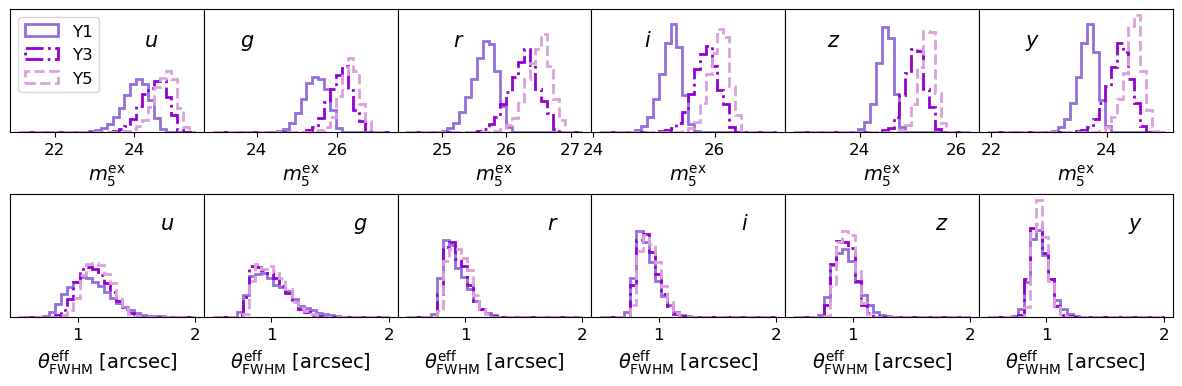

In [13]:
# plot:
fig,axarr=plt.subplots(2,6,figsize=[15,4],sharey='row')

plt.rcParams['xtick.labelsize'] = 12
colors={1:"mediumpurple",
       3:"darkviolet",
       5:"plum"}
ls={1:"-",
       3:"-.",
       5:"--"}

for ii, band in enumerate(["u","g","r","i","z","y"]):
    plt.sca(axarr[0,ii])
    for year in [1,3,5]:
        range=bins_depth[ii]
        bins=30
        cc=plt.hist(depth_map[band][year],histtype='step',density=True, bins=bins, range=range,
                   label=f"Y{year}",lw=2,color=colors[year],ls=ls[year])
    if ii==0:
        plt.text(range[1]*0.95, 2.0, f"${band}$")
    else:
        plt.text(range[0]*1.03, 2.0, f"${band}$")
    plt.xlabel("$m_5^{\\rm ex}$",fontsize="14")
    plt.yticks([])
    
    plt.sca(axarr[1,ii])
    for year in [1,3,5]:
        bins=np.linspace(0.5,2,30)
        cc=plt.hist(seeing_map[band][year],histtype='step',density=True, bins=bins,
                   lw=2,color=colors[year],ls=ls[year])
    plt.xlabel("$\\theta^{\\rm eff}_{\\rm FWHM}$ [arcsec]",fontsize="14")
    plt.yticks([])
    plt.text(1.7, 5.0, f"${band}$")

    #plt.sca(axarr[2,ii])
    #for year in [1,3,5]:
    #    bins=np.linspace(1,1.7,30)
    #    cc=plt.hist(airmass_map[band][year],histtype='step',density=True,bins=bins,
    #               lw=2,color=colors[year],ls=ls[year])
    #plt.xlabel("$X$",fontsize="14")
    #plt.yticks([])
    
plt.sca(axarr[0,0])
plt.legend(fontsize="12")
plt.subplots_adjust(wspace=0,hspace=0.5)

plt.savefig("plots/obscond_dist_y135.pdf",bbox_inches="tight")

In [16]:
cc[0]

array([0.00000000e+00, 5.02140156e-04, 2.12907426e-01, 2.21343381e+00,
       7.90820532e+00, 1.15954205e+01, 5.88859761e+00, 2.57095760e+00,
       1.88553629e+00, 1.69221233e+00, 1.39946461e+00, 1.00026319e+00,
       8.19492735e-01, 7.64759458e-01, 7.06511199e-01, 5.93027524e-01,
       5.64907675e-01, 4.71007466e-01, 4.71007466e-01, 3.94180022e-01,
       1.80770456e-01, 6.42739400e-02, 1.60684850e-02, 7.02996218e-03,
       7.02996218e-03, 1.00428031e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [8]:
# find i-band 1 and 2 sigma regions for Y1, Y3, and Y5
band="i"

one_sig_min=(1-0.68)/2
one_sig_max=1-(1-0.68)/2

two_sig_min=(1-0.95)/2
two_sig_max=1-(1-0.95)/2

for year in [1,3,5]:
    # find 68% and 95% boundary: 
    x=np.cumsum(np.sort(depth_map[band][year]))
    x=x/x[-1]
    
    frac1=np.argmin(np.abs(x-one_sig_min))
    frac2=np.argmin(np.abs(x-one_sig_max))
    
    frac3=np.argmin(np.abs(x-two_sig_min))
    frac4=np.argmin(np.abs(x-two_sig_max))
    
    d=np.sort(depth_map[band][year])
    print("1 sig", d[frac1], d[frac2], "2 sig", d[frac3], d[frac4])

1 sig 25.10831734035308 25.432621792640763 2 sig 24.906584169584217 25.554951298306165
1 sig 25.651075695696537 26.05444784863291 2 sig 25.414553614216192 26.211262818124343
1 sig 25.899129292179566 26.227507341256548 2 sig 25.712960163359988 26.355043617943952


## 2. photo-z vs true-z

In [3]:
# load the data set:
samp={}
samp_snr={}
samp_odds={}

gold_i_10yr=25.3
for year in [1,3,5]:
    samp[year]={}
    samp_snr[year]={}
    samp_odds[year]={}
    
    gold_i = gold_i_10yr - 2.5*np.log10(np.sqrt(10/year))
    gold_i = round(gold_i,1)
    
    root=f'/pscratch/sd/q/qhang/roman-rubin-sims/baselinev3.3/y{year}/'
    for q in [0,9]:
        fpz = root + f'bpz/roman-rubin_sample_obs_cal-coaddm5-i-qtl-{q}-zmode.pkl'
        fcat = root + f'roman-rubin_sample_obs_cal-coaddm5-i-qtl-{q}.pkl'
        cat = svf.dump_load(fcat)
        #cat = cat.drop(columns="index").reset_index(drop=True)
        pz = svf.dump_load(fpz)
        pz = pd.DataFrame(data={"z_mode": pz[:,0], "odds": pz[:,1]}, index=np.arange(len(cat)))
        cat = pd.concat([cat, pz], axis=1)
        
        fpz = root + f'fzb/roman-rubin_sample_obs_cal-coaddm5-i-qtl-{q}-zmode.pkl'
        pz = svf.dump_load(fpz)
        pz = pd.DataFrame(data={"z_mode_fzb": pz[:,0]}, index=np.arange(len(cat)))
        cat = pd.concat([cat, pz], axis=1)
        
        #cat2 = svf.select_data_with_cuts(cat, i_lim=24.1, snr_lim=10)
        # select i-band first
        ind1=cat["ObsMag_i"]<gold_i
        snr=1/(10**(cat["ObsMagErr_i"]/2.5)-1)
        ind2=snr>=10
        ind3 = cat["odds"]>=0.9

        samp[year][q]=[cat["z_mode"][ind1], cat["redshift"][ind1], cat["z_mode_fzb"][ind1]]
        samp_snr[year][q]=[cat["z_mode"][ind1*ind2], cat["redshift"][ind1*ind2],
                          cat["z_mode_fzb"][ind1*ind2]]
        samp_odds[year][q]=[cat["z_mode"][ind1*ind2*ind3], 
                            cat["redshift"][ind1*ind2*ind3]]

In [4]:
for year in [1,3,5]:
    print(len(samp_odds[year][0][0])/len(samp_snr[year][0][0]))

0.20376631148623967
0.256582139356193
0.2952785008217799


In [5]:
for year in [1,3,5]:
    print(len(samp_odds[year][9][0])/len(samp_snr[year][9][0]))

0.27651772220479626
0.4440130653193056
0.43976308147240567


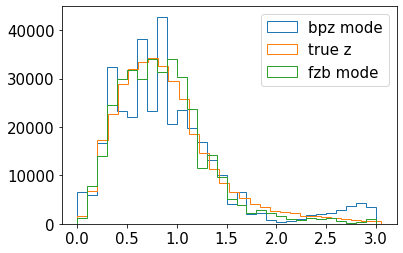

In [34]:
#plt.scatter(samp[year][q][0][:5],samp[year][q][1][:5])
#print(samp[year][q][0][:5], samp[year][q][1][:5])
cc=plt.hist(samp[year][q][0],bins=30,histtype='step',label="bpz mode")
cc=plt.hist(samp[year][q][1],bins=30,histtype='step',label="true z")
cc=plt.hist(samp[year][q][2],bins=30,histtype='step',label="fzb mode")
plt.legend()

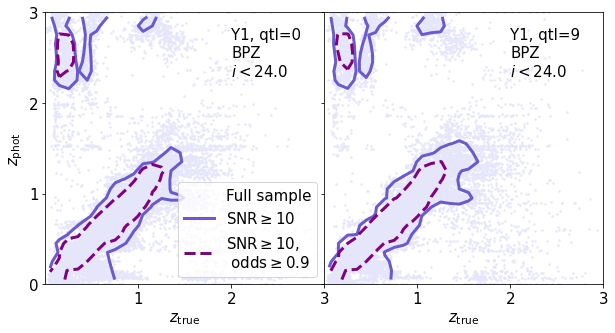

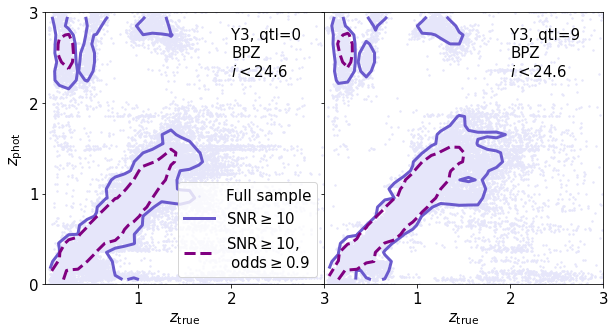

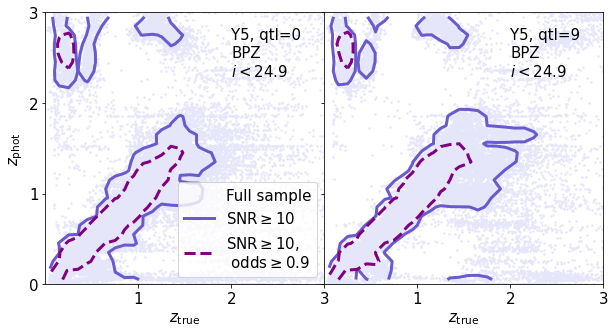

In [11]:
for jj,year in enumerate([1,3,5]):
    fig,axarr=plt.subplots(1,2,figsize=[10,5],sharey=True)
    gold_i = gold_i_10yr - 2.5*np.log10(np.sqrt(10/year))
    gold_i = round(gold_i,1)
    for ii, q in enumerate([0,9]):
        plt.sca(axarr[ii])
        plt.scatter(samp[year][q][1][::5], samp[year][q][0][::5], s=2, 
                    color='lavender', label="Full sample")
        
        # plot contours for snr selection and odds selection:
        cc = np.histogram2d(samp_snr[year][q][1],samp_snr[year][q][0],bins=[30,30],
                           range=[[0,3],[0,3]])
        xx=(cc[1][1:]+cc[1][:-1])/2.
        yy=(cc[2][1:]+cc[2][:-1])/2.
        zz=cc[0]/np.sum(cc[0].flatten())
        # find levels including 90% of the sample
        sortz = np.sort(zz.flatten())
        num = np.cumsum(sortz)
        ind=np.where(num > 0.05)[0][0]
        levels=sortz[ind]
        CS = axarr[ii].contour(xx,yy,zz.T,levels=[levels], colors='slateblue', 
                               linewidths=3)
        plt.plot([0],[0],color='slateblue', lw=3, label="SNR$\\geq10$")
        # plot contours for snr selection and odds selection:
        cc = np.histogram2d(samp_odds[year][q][1],samp_odds[year][q][0],bins=[30,30],
                           range=[[0,3],[0,3]])
        xx=(cc[1][1:]+cc[1][:-1])/2.
        yy=(cc[2][1:]+cc[2][:-1])/2.
        zz=cc[0]/np.sum(cc[0].flatten())
        # find levels including 90% of the sample
        sortz = np.sort(zz.flatten())
        num = np.cumsum(sortz)
        ind=np.where(num > 0.05)[0][0]
        levels=sortz[ind]
        CS = axarr[ii].contour(xx,yy,zz.T,levels=[levels], colors='purple', 
                               linewidths=3, linestyles='dashed')
        plt.plot([0],[0],color='purple', lw=3, ls='--', label="SNR$\\geq10$, \n odds$\\geq0.9$")
        plt.xlim([0,3])
        plt.ylim([0,3])
        plt.xticks([1,2,3])
        plt.xlabel("$z_{\\rm true}$")
        plt.text(2,2.7,f"Y{year}, qtl={q}")
        plt.text(2,2.5,"BPZ")
        plt.text(2,2.3,f"$i<{gold_i}$")
        if ii==0:
            plt.ylabel("$z_{\\rm phot}$")
            plt.legend(loc="lower right")
    plt.yticks([0,1,2,3])
    plt.subplots_adjust(wspace=0)
    plt.savefig(f"plots/photoz-specz-scatter-roman-rubin-Y{year}-bpz.png",
               bbox_inches="tight")

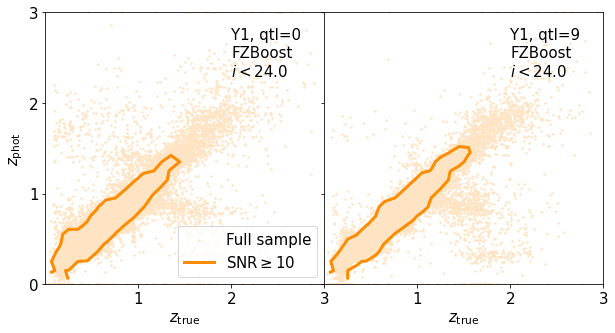

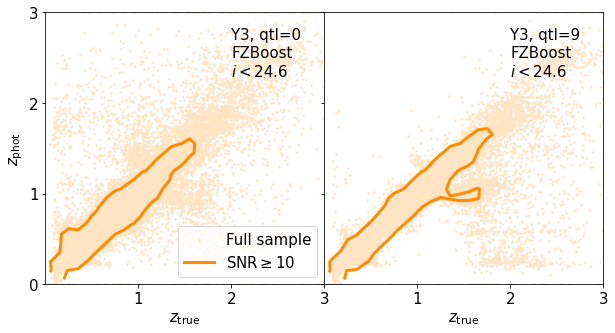

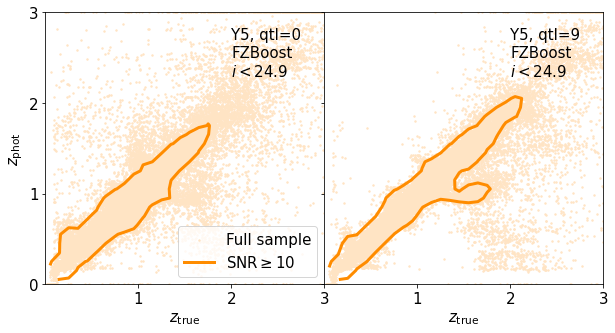

In [14]:
for jj,year in enumerate([1,3,5]):
    fig,axarr=plt.subplots(1,2,figsize=[10,5],sharey=True)
    gold_i = gold_i_10yr - 2.5*np.log10(np.sqrt(10/year))
    gold_i = round(gold_i,1)
    for ii, q in enumerate([0,9]):
        plt.sca(axarr[ii])
        plt.scatter(samp[year][q][1][::5], samp[year][q][2][::5], s=2, 
                    color='bisque', label="Full sample")
        

        # plot contours for snr selection and odds selection:
        cc = np.histogram2d(samp_snr[year][q][1],samp_snr[year][q][2],bins=[30,30],
                           range=[[0,3],[0,3]])
        xx=(cc[1][1:]+cc[1][:-1])/2.
        yy=(cc[2][1:]+cc[2][:-1])/2.
        zz=cc[0]/np.sum(cc[0].flatten())
        # find levels including 90% of the sample
        sortz = np.sort(zz.flatten())
        num = np.cumsum(sortz)
        ind=np.where(num > 0.05)[0][0]
        levels=sortz[ind]
        CS = axarr[ii].contour(xx,yy,zz.T,levels=[levels], colors='darkorange', 
                               linewidths=3)
        plt.plot([0],[0],color='darkorange', lw=3, label="SNR$\\geq10$")
        plt.xlim([0,3])
        plt.ylim([0,3])
        plt.xticks([1,2,3])
        plt.xlabel("$z_{\\rm true}$")
        plt.text(2,2.7,f"Y{year}, qtl={q}")
        plt.text(2,2.5,"FZBoost")
        plt.text(2,2.3,f"$i<{gold_i}$")
        if ii==0:
            plt.ylabel("$z_{\\rm phot}$")
            plt.legend(loc="lower right")

    plt.yticks([0,1,2,3])
    plt.subplots_adjust(wspace=0)
    plt.savefig(f"plots/photoz-specz-scatter-roman-rubin-Y{year}-fzb.png",
               bbox_inches="tight")

In [31]:
# print mean, scatter, outlier rates

def pz_stats(zspec,zphot):
    
    stats=[]
    
    z_spec = np.copy(zspec)
    z_phot=np.copy(zphot)
    x = np.arange(0,5.4,0.05)

    # define differences of >0.15*(1+z) as non-Gaussian 'outliers'    
    outlier_upper = x + 0.15*(1+x)
    outlier_lower = x - 0.15*(1+x)

    mask = np.abs((z_phot - z_spec)/(1 + z_spec)) > 0.15
    notmask = ~mask 
    
    #Standard Deviation of the predicted redshifts compared to the data:
    std_result = np.std((z_phot - z_spec)/(1 + z_spec), ddof=1)

    #Normalized MAD (Median Absolute Deviation):
    nmad = 1.48 * np.median(np.abs((z_phot - z_spec)/(1 + z_spec)))

    #Percentage of delta-z > 0.15(1+z) outliers:
    eta = np.sum(np.abs((z_phot - z_spec)/(1 + z_spec)) > 0.15)/len(z_spec)
    
    #Median offset (normalized by (1+z); i.e., bias:
    bias = np.median(((z_phot - z_spec)/(1 + z_spec)))
    sigbias=std_result/np.sqrt(0.64*len(z_phot))
    
    print('bias, std, snmad, outlier f')
    print(round(bias,3), "&", round(std_result,3), "&", round(nmad,4), "&",
          round((eta*100),1), "\%")

In [33]:
print("BPZ")
for jj,year in enumerate([1,3,5]):
    for ii, q in enumerate([0,9]):
        print(year, q)
        pz_stats(samp_odds[year][q][1],samp_odds[year][q][0])

BPZ
1 0
bias, std, snmad, outlier f
-0.002 & 0.434 & 0.0423 & 5.6 \%
1 9
bias, std, snmad, outlier f
-0.006 & 0.388 & 0.04 & 4.6 \%
3 0
bias, std, snmad, outlier f
-0.006 & 0.383 & 0.0405 & 4.8 \%
3 9
bias, std, snmad, outlier f
-0.008 & 0.337 & 0.0424 & 4.3 \%
5 0
bias, std, snmad, outlier f
-0.006 & 0.368 & 0.0405 & 4.9 \%
5 9
bias, std, snmad, outlier f
-0.007 & 0.33 & 0.0445 & 4.5 \%


In [35]:
print("FZB")
for jj,year in enumerate([1,3,5]):
    for ii, q in enumerate([0,9]):
        print(year, q)
        pz_stats(samp_snr[year][q][1],samp_snr[year][q][2])

FZB
1 0
bias, std, snmad, outlier f
0.006 & 0.07 & 0.0391 & 2.9 \%
1 9
bias, std, snmad, outlier f
-0.004 & 0.066 & 0.0343 & 2.4 \%
3 0
bias, std, snmad, outlier f
0.004 & 0.087 & 0.0311 & 3.1 \%
3 9
bias, std, snmad, outlier f
-0.003 & 0.066 & 0.0238 & 2.8 \%
5 0
bias, std, snmad, outlier f
0.002 & 0.082 & 0.0295 & 3.4 \%
5 9
bias, std, snmad, outlier f
-0.003 & 0.067 & 0.0238 & 3.2 \%


#### Check outliers
Take one subsample in BPZ, check what does the PDF look like for individual galaxies in the outlier population.

## 3. $n(z)$ distribution:

In [14]:
# Load data:
# bpz:
root = '/pscratch/sd/q/qhang/roman-rubin-sims/baselinev3.3/'
# bpz snr>10
packed_stats_lens={}
for year in [1,3,5]:
    fname=root+f'y{year}/bpz/test-pz-with-i-band-coadd-Y{year}-snr-10.0-lens.yml'
    with open(fname, "r") as stream:
        packed_stats_lens[year]=yaml.load(stream,Loader=yaml.Loader)

# snr>10, odds>0.9
packed_stats_odds_lens={}
for year in [1,3,5]:
    fname=root+f'y{year}/bpz/test-pz-with-i-band-coadd-Y{year}-snr-10.0-odds-0.9-lens.yml'
    with open(fname, "r") as stream:
        packed_stats_odds_lens[year]=yaml.load(stream,Loader=yaml.Loader)
        
# fzb snr>10
packed_stats_fzb_lens={}
for year in [1,3,5]:
    fname=root+f'y{year}/fzb/test-pz-with-i-band-coadd-Y{year}-snr-10.0-lens.yml'
    with open(fname, "r") as stream:
        packed_stats_fzb_lens[year]=yaml.load(stream,Loader=yaml.Loader)

In [15]:
# source
# snr>10
packed_stats_source={}
for year in [1,3,5]:
    fname=root+f'y{year}/bpz/test-pz-with-i-band-coadd-Y{year}-snr-10.0-source.yml'
    with open(fname, "r") as stream:
        packed_stats_source[year]=yaml.load(stream,Loader=yaml.Loader)

# snr>10, odds>0.9
packed_stats_odds_source={}
for year in [1,3,5]:
    fname=root+f'y{year}/bpz/test-pz-with-i-band-coadd-Y{year}-snr-10.0-odds-0.9-source.yml'
    with open(fname, "r") as stream:
        packed_stats_odds_source[year]=yaml.load(stream,Loader=yaml.Loader)

# fzb snr>10
packed_stats_fzb_source={}
for year in [1,3,5]:
    fname=root+f'y{year}/fzb/test-pz-with-i-band-coadd-Y{year}-snr-10.0-source.yml'
    with open(fname, "r") as stream:
        packed_stats_fzb_source[year]=yaml.load(stream,Loader=yaml.Loader)

In [ ]:
for year in [1,3,5]:
    fig,axarr=plt.subplots(3,2, figsize=[20,6],sharex=True, sharey=True)
    
    #fig.suptitle(f"Year {year}")
    stats=[packed_stats_lens[year], packed_stats_source[year],
           packed_stats_odds_lens[year], packed_stats_odds_source[year],
          packed_stats_fzb_lens[year], packed_stats_fzb_source[year]]
    
    title=[f"Y{year} lens", f"Y{year} source"]
    text=["BPZ, SNR$\\geq 10$", "BPZ, SNR$\\geq 10$", 
          "BPZ, SNR$\\geq 10$, odds$\\geq 0.9$", "BPZ, SNR$\\geq 10$, odds$\\geq 0.9$",
         "FZBoost, SNR$\\geq 10$", "FZBoost, SNR$\\geq 10$"]
    
    for ii in range(3):
        for jj in range(2):
            plt.sca(axarr[ii,jj])
            mm = ii*2+jj
            for kk in range(5):
                colorlab=(kk+1)/(5*1.2)
                
                # total case
                #nz = stats["tomo-%d"%(kk+1)]["nztot"]
                #y=nz[:,1]/np.sum(nz[:,1])/(nz[1,0]-nz[0,0])
                #plt.fill_between(nz[:,0], 0, y, color=cmap(colorlab),alpha=0.3, label='Full')

                # qtl 0 and 9
                nz = stats[mm]["tomo-%d"%(kk+1)]["nz"][0]
                y=nz[:,1]/np.sum(nz[:,1])/(nz[1,0]-nz[0,0])
                plt.plot(nz[:,0], y, color=cmap(colorlab),lw=2, ls="--")

                nz = stats[mm]["tomo-%d"%(kk+1)]["nz"][9]
                y=nz[:,1]/np.sum(nz[:,1])/(nz[1,0]-nz[0,0])
                plt.plot(nz[:,0], y, color=cmap(colorlab),lw=2)
            plt.xlim([0,1.5])
            plt.ylim([0,7.5])
            plt.xticks([0.25,0.75,1.25])
            if ii==0:
                plt.title(title[jj])
            if jj==0:
                plt.ylabel("$p(z)$")
            if ii==2:
                plt.xlabel("$z_{\\rm true}$")
            plt.text(0.06,6.4,text[mm])
            plt.yticks([0,5])
    
    plt.sca(axarr[0,1])
    plt.plot([0],[0],'k--',label="qtl=0")
    plt.plot([0],[0],'k-',label="qtl=9")
    plt.legend()
    plt.subplots_adjust(hspace=0, wspace=0)
    
    if year ==3:
        plt.savefig(f"plots/nz-baselinev3.3-y{year}-long.pdf",bbox_inches="tight")

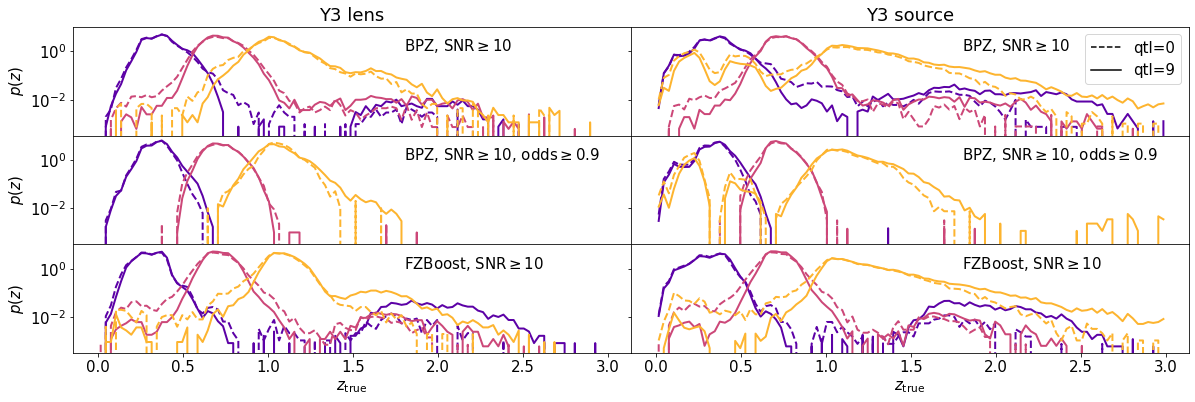

In [11]:
for year in [3]:
    fig,axarr=plt.subplots(3,2, figsize=[20,6],sharex=True, sharey=True)
    
    #fig.suptitle(f"Year {year}")
    stats=[packed_stats_lens[year], packed_stats_source[year],
           packed_stats_odds_lens[year], packed_stats_odds_source[year],
          packed_stats_fzb_lens[year], packed_stats_fzb_source[year]]
    
    title=[f"Y{year} lens", f"Y{year} source"]
    text=["BPZ, SNR$\\geq 10$", "BPZ, SNR$\\geq 10$", 
          "BPZ, SNR$\\geq 10$, odds$\\geq 0.9$", "BPZ, SNR$\\geq 10$, odds$\\geq 0.9$",
         "FZBoost, SNR$\\geq 10$", "FZBoost, SNR$\\geq 10$"]
    
    for ii in range(3):
        for jj in range(2):
            plt.sca(axarr[ii,jj])
            mm = ii*2+jj
            for kk in [0,2,4]:
                colorlab=(kk+1)/(5*1.2)
                
                # total case
                #nz = stats["tomo-%d"%(kk+1)]["nztot"]
                #y=nz[:,1]/np.sum(nz[:,1])/(nz[1,0]-nz[0,0])
                #plt.fill_between(nz[:,0], 0, y, color=cmap(colorlab),alpha=0.3, label='Full')

                # qtl 0 and 9
                nz = stats[mm]["tomo-%d"%(kk+1)]["nz"][0]
                y=nz[:,1]/np.sum(nz[:,1])/(nz[1,0]-nz[0,0])
                plt.plot(nz[:,0], y, color=cmap(colorlab),lw=2, ls="--")

                nz = stats[mm]["tomo-%d"%(kk+1)]["nz"][9]
                y=nz[:,1]/np.sum(nz[:,1])/(nz[1,0]-nz[0,0])
                plt.plot(nz[:,0], y, color=cmap(colorlab),lw=2)
            #plt.xlim([0,1.5])
            #plt.ylim([0,7.5])
            #plt.xticks([0.25,0.75,1.25])
            if ii==0:
                plt.title(title[jj])
            if jj==0:
                plt.ylabel("$p(z)$")
            if ii==2:
                plt.xlabel("$z_{\\rm true}$")
            plt.text(1.8,1,text[mm])
            #plt.yticks([0,5])
    
    plt.sca(axarr[0,1])
    plt.plot([0],[0],'k--',label="qtl=0")
    plt.plot([0],[0],'k-',label="qtl=9")
    plt.legend()
    plt.subplots_adjust(hspace=0, wspace=0)
    plt.yscale("log")
    
    plt.savefig(f"plots/nz-baselinev3.3-y{year}-long-logy.pdf",bbox_inches="tight")

## 4. Stuff vs depth

In [10]:
# load stuff:
bands = ['u','g','r','i','z','y']

qtl = {}
mean_sys = {}

for year in [1,3,5]:
    savedir = f"/pscratch/sd/q/qhang/roman-rubin-sims/baselinev3.3/y{year}/"
    sys_info = savedir + "ExgalM5-i-qtl-mean-weights.txt"
    fin=np.loadtxt(sys_info)
    qtl[year]=fin[:,0]
    mean_sys[year]=fin[:-1,1]
    print("mean_sys: ", mean_sys[year])

qweights=fin[:-1,2]
nquantiles=len(qtl[1])-1
#print(qtl)
print(nquantiles)

mean_sys:  [24.9472875  25.09707362 25.16991563 25.2242605  25.26846982 25.30885744
 25.34801041 25.38904948 25.43852494 25.52863916]
mean_sys:  [25.46029227 25.63755978 25.71517321 25.77605301 25.83087167 25.88211628
 25.93215028 25.98745145 26.06315664 26.17922218]
mean_sys:  [25.74832672 25.88864028 25.95620054 26.01219159 26.06075136 26.10360003
 26.14284496 26.18387958 26.23397825 26.32683306]
10


In [9]:
one_sig_depth={1:[25.10831734035308, 25.432621792640763],
               3:[25.651075695696537, 26.05444784863291],
               5:[25.899129292179566, 26.227507341256548],}

two_sig_depth={1:[24.906584169584217, 25.554951298306165],
               3:[25.414553614216192, 26.211262818124343],
               5:[25.712960163359988, 26.355043617943952],}

In [12]:
gold_i_10yr=25.3

### 4.1. $N_{\rm gal}$ vs depth

In [50]:
cmap2= matplotlib.cm.get_cmap('bone')

In [60]:
label1={}
for year in [1,3,5]:
    label1[year]=[]
    for kk in range(5):
        if year==1:
            label1[year].append('tomo-%d'%(kk+1))
        else:
            label1[year].append('')

label2={}
for year in [1,3,5]:
    label2[year]=[]
    for kk in range(5):
        if year==3:
            label2[year].append('tomo-%d'%(kk+1))
        else:
            label2[year].append('')

In [ ]:
for year in [1,3,5]:
    gold_i = gold_i_10yr - 2.5*np.log10(np.sqrt(10/year))
    gold_i = round(gold_i,1)
    fig,axarr=plt.subplots(1,2,figsize=[10,5],sharex=True,sharey=True)

    # BPZ lens
    stats=[packed_stats_lens[year], packed_stats_source[year]]
    stats_odds=[packed_stats_odds_lens[year], packed_stats_odds_source[year]]

    for ii in range(2):
        plt.sca(axarr[ii])
        
        # plot 1 and 2 sigma range:
        plt.plot([one_sig_depth[year][0], one_sig_depth[year][0]], [0.5,1.8], color='lightgrey', lw=3)
        plt.plot([one_sig_depth[year][1], one_sig_depth[year][1]], [0.5,1.8], color='lightgrey', lw=3)
        plt.plot([two_sig_depth[year][0], two_sig_depth[year][0]], [0.5,1.8], color='lightgrey',lw=3,ls='--')
        plt.plot([two_sig_depth[year][1], two_sig_depth[year][1]], [0.5,1.8], color='lightgrey',lw=3,ls='--')
        
        for kk in range(5):
            colorlab = (kk+1)/(5*1.2)
            # BPZ
            plt.sca(axarr[ii])
            
            N_galaxies=np.zeros(10)
            for q in range(10):
                nz = stats[ii]["tomo-%d"%(kk+1)]["nz"][q]
                N_galaxies[q]=np.sum(nz[:,1])
            # show
            N_mean=np.sum(N_galaxies*qweights)/np.sum(qweights)
            plt.plot(mean_sys[year], N_galaxies/N_mean, 'o-',fillstyle="full",
                     label=label1[year][kk],color=cmap(colorlab),lw=2)
            
            N_galaxies=np.zeros(10)
            for q in range(10):
                nz = stats_odds[ii]["tomo-%d"%(kk+1)]["nz"][q]
                N_galaxies[q]=np.sum(nz[:,1])
            # show
            N_mean=np.sum(N_galaxies*qweights)/np.sum(qweights)
            plt.plot(mean_sys[year]+0.01, N_galaxies/N_mean, 's--',fillstyle="full",
                     color=cmap2(colorlab),label=label2[year][kk])
        plt.xlabel("$i$ ExgalM5")
        plt.ylim([0.5,1.8])
        
        if ii==0:
            plt.ylabel("$N_{\\rm gal}/\\bar{N}_{\\rm gal}$")

    plt.subplots_adjust(wspace=0,hspace=0)
    
    if year in [1,3]:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 1.3, f"Y{year} lens")
        plt.text(mean_sys[year][0], 1.2, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 1.1, "BPZ, SNR$\\geq10$")
    else:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 1.7, f"Y{year} lens")
        plt.text(mean_sys[year][0], 1.6, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 1.5, "BPZ, SNR$\\geq10$")

    plt.sca(axarr[1])
    plt.text(mean_sys[year][0], 1.7, f"Y{year} source")
    plt.text(mean_sys[year][0], 1.6, f"$i<{gold_i}$")
    plt.text(mean_sys[year][0], 1.5, "BPZ, SNR$\\geq10$")
    
    if year==1:
        plt.sca(axarr[0])
        plt.plot(mean_sys[year][0], 0.1, 's--',fillstyle="full",
                     color='k',alpha=0.7, label="odds$\\geq 0.9$")
        plt.legend(loc="upper left", ncol=2)
    if year==3:
        plt.sca(axarr[0])
        plt.xticks([25.5,25.8,26.1])
        plt.legend(loc="upper left", ncol=2)
        
    plt.savefig(f"plots/ngal-baselinev3.3-Y{year}-bpz.pdf",bbox_inches="tight")

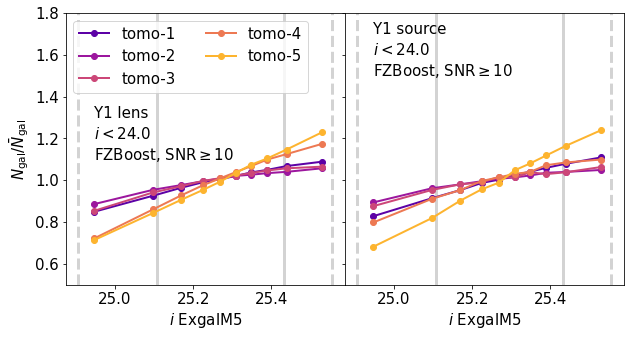

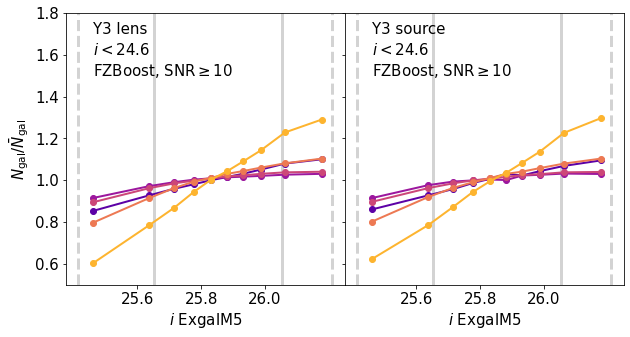

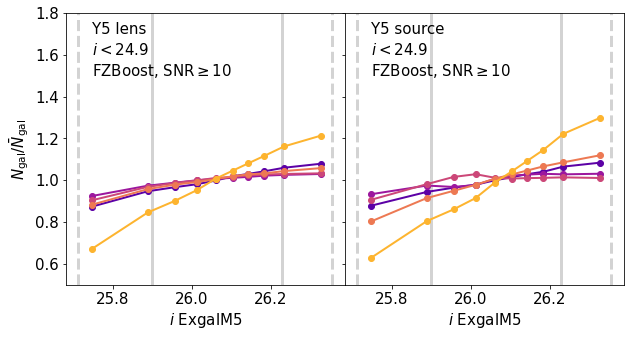

In [68]:
for year in [1,3,5]:
    gold_i = gold_i_10yr - 2.5*np.log10(np.sqrt(10/year))
    gold_i = round(gold_i,1)
    fig,axarr=plt.subplots(1,2,figsize=[10,5],sharex=True,sharey=True)

    # FZB
    stats=[packed_stats_fzb_lens[year], packed_stats_fzb_source[year]]

    for ii in range(2):
        plt.sca(axarr[ii])
        # plot 1 and 2 sigma range:
        plt.plot([one_sig_depth[year][0], one_sig_depth[year][0]], [0.5,1.8], color='lightgrey', lw=3)
        plt.plot([one_sig_depth[year][1], one_sig_depth[year][1]], [0.5,1.8], color='lightgrey', lw=3)
        plt.plot([two_sig_depth[year][0], two_sig_depth[year][0]], [0.5,1.8], color='lightgrey',lw=3,ls='--')
        plt.plot([two_sig_depth[year][1], two_sig_depth[year][1]], [0.5,1.8], color='lightgrey',lw=3,ls='--')
        for kk in range(5):
            colorlab = (kk+1)/(5*1.2)
            # BPZ
            plt.sca(axarr[ii])
            
            N_galaxies=np.zeros(10)
            for q in range(10):
                nz = stats[ii]["tomo-%d"%(kk+1)]["nz"][q]
                N_galaxies[q]=np.sum(nz[:,1])
            # show
            N_mean=np.sum(N_galaxies*qweights)/np.sum(qweights)
            plt.plot(mean_sys[year], N_galaxies/N_mean, 'o-',fillstyle="full",
                     label='tomo-%d'%(kk+1),color=cmap(colorlab),lw=2)
            
        plt.xlabel("$i$ ExgalM5")
        plt.ylim([0.5,1.8])
        if ii==0:
            plt.ylabel("$N_{\\rm gal}/\\bar{N}_{\\rm gal}$")

    plt.subplots_adjust(wspace=0,hspace=0)
    
    if year==1:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 1.3, f"Y{year} lens")
        plt.text(mean_sys[year][0], 1.2, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 1.1, "FZBoost, SNR$\\geq10$")
    else:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 1.7, f"Y{year} lens")
        plt.text(mean_sys[year][0], 1.6, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 1.5, "FZBoost, SNR$\\geq10$")

    plt.sca(axarr[1])
    plt.text(mean_sys[year][0], 1.7, f"Y{year} source")
    plt.text(mean_sys[year][0], 1.6, f"$i<{gold_i}$")
    plt.text(mean_sys[year][0], 1.5, "FZBoost, SNR$\\geq10$")
    
    plt.sca(axarr[0])
    if year==1:
        plt.legend(loc="upper left", ncol=2)
    if year==3:
        plt.xticks([25.6,25.8,26.0])
        
    plt.savefig(f"plots/ngal-baselinev3.3-Y{year}-fzb.pdf",bbox_inches="tight")

### 4.2. $\Delta \langle z \rangle$ vs depth

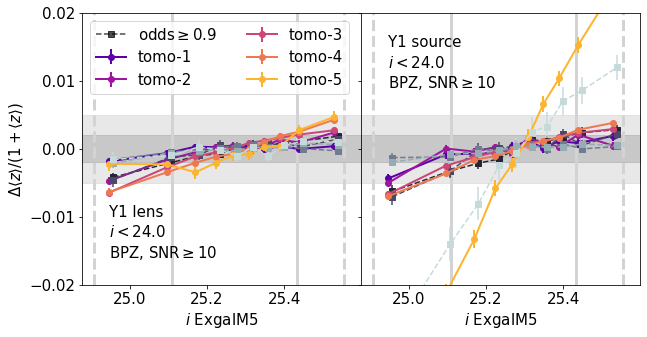

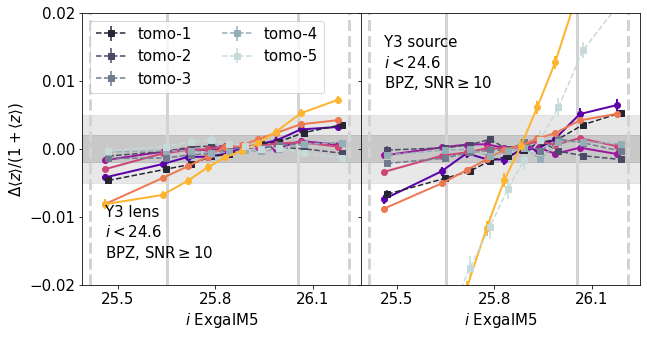

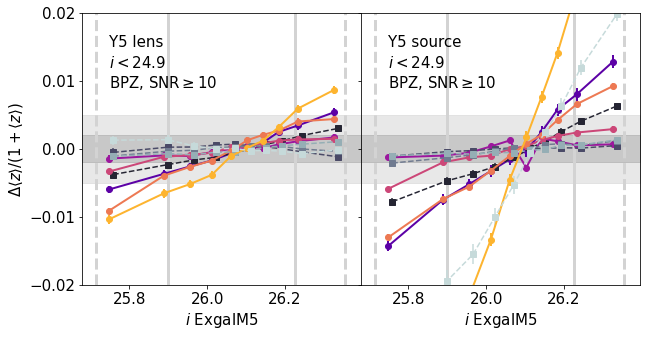

In [85]:
for year in [1,3,5]:
    gold_i = gold_i_10yr - 2.5*np.log10(np.sqrt(10/year))
    gold_i = round(gold_i,1)
    fig,axarr=plt.subplots(1,2,figsize=[10,5],sharex=True,sharey=True)

    # BPZ lens
    stats=[packed_stats_lens[year], packed_stats_source[year]]
    stats_odds=[packed_stats_odds_lens[year], packed_stats_odds_source[year]]

    for ii in range(2):
        plt.sca(axarr[ii])
        # plot 1 and 2 sigma range:
        plt.plot([one_sig_depth[year][0], one_sig_depth[year][0]], [-0.02,0.02], color='lightgrey', lw=3)
        plt.plot([one_sig_depth[year][1], one_sig_depth[year][1]], [-0.02,0.02], color='lightgrey', lw=3)
        plt.plot([two_sig_depth[year][0], two_sig_depth[year][0]], [-0.02,0.02], color='lightgrey',lw=3,ls='--')
        plt.plot([two_sig_depth[year][1], two_sig_depth[year][1]], [-0.02,0.02], color='lightgrey',lw=3,ls='--')
        for kk in range(5):
            colorlab = (kk+1)/(5*1.2)
            # BPZ
            meanz = stats[ii]["tomo-%d"%(kk+1)]["meanz"]
            meanztot = stats[ii]["tomo-%d"%(kk+1)]["meanztot"]
            plt.errorbar(mean_sys[year], (meanz[:,0]-meanztot)/(1+meanztot), 
                         yerr=meanz[:,1]/(1+meanztot),fmt='o-',
                         color=cmap(colorlab),label=label1[year][kk],lw=2)
    
            # BPZ odds
            meanz = stats_odds[ii]["tomo-%d"%(kk+1)]["meanz"]
            meanztot = stats_odds[ii]["tomo-%d"%(kk+1)]["meanztot"]
            plt.errorbar(mean_sys[year]+0.01, (meanz[:,0]-meanztot)/(1+meanztot), 
                         yerr=meanz[:,1]/(1+meanztot),fmt='s--',
                         fillstyle="full",
                         color=cmap2(colorlab),label=label2[year][kk])

        plt.xlabel("$i$ ExgalM5")
        plt.ylim([-0.02,0.02])
        if ii==0:
            plt.ylabel("$\\Delta \\langle z\\rangle / (1+\\langle z\\rangle)$")
            plt.yticks([-0.02,-0.01,0,0.01,0.02])
        plt.fill_between([mean_sys[year][0]-0.07, mean_sys[year][-1]+0.07],
                        [-0.005,-0.005],[0.005,0.005],color='lightgrey', alpha=0.5)
        plt.fill_between([mean_sys[year][0]-0.07, mean_sys[year][-1]+0.07],
                        [-0.002,-0.002],[0.002,0.002],color='grey', alpha=0.3)
        plt.xlim([mean_sys[year][0]-0.07, mean_sys[year][-1]+0.07])

    plt.subplots_adjust(wspace=0,hspace=0)
    
    if year in [1,3]:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], -0.01, f"Y{year} lens")
        plt.text(mean_sys[year][0], -0.013, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], -0.016, "BPZ, SNR$\\geq10$")
    else:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 0.015, f"Y{year} lens")
        plt.text(mean_sys[year][0], 0.012, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 0.009, "BPZ, SNR$\\geq10$")

    plt.sca(axarr[1])
    plt.text(mean_sys[year][0], 0.015, f"Y{year} source")
    plt.text(mean_sys[year][0], 0.012, f"$i<{gold_i}$")
    plt.text(mean_sys[year][0], 0.009, "BPZ, SNR$\\geq10$")
    
    
    if year==1:
        plt.sca(axarr[0])
        plt.plot(mean_sys[year][0], 0.1, 's--',fillstyle="full",
                     color='k',alpha=0.7, label="odds$\\geq 0.9$")
        plt.legend(loc="upper left", ncol=2)
    if year==3:
        plt.sca(axarr[0])
        plt.xticks([25.5,25.8,26.1])
        plt.legend(loc="upper left", ncol=2)
        
    plt.savefig(f"plots/meanz-baselinev3.3-Y{year}-bpz.pdf",bbox_inches="tight")

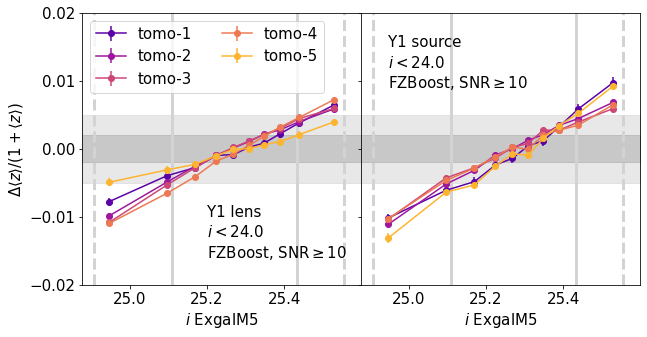

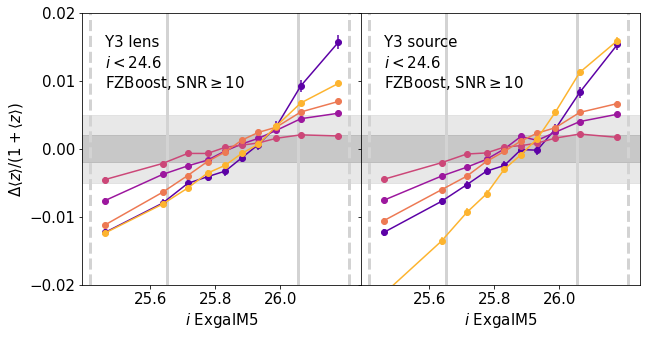

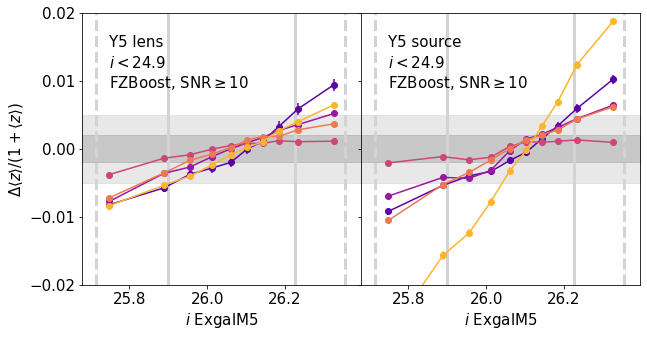

In [81]:
for year in [1,3,5]:
    gold_i = gold_i_10yr - 2.5*np.log10(np.sqrt(10/year))
    gold_i = round(gold_i,1)
    fig,axarr=plt.subplots(1,2,figsize=[10,5],sharex=True,sharey=True)

    # FZB lens
    stats=[packed_stats_fzb_lens[year], packed_stats_fzb_source[year]]

    for ii in range(2):
        plt.sca(axarr[ii])
        # plot 1 and 2 sigma range:
        plt.plot([one_sig_depth[year][0], one_sig_depth[year][0]], [-0.02,0.02], color='lightgrey', lw=3)
        plt.plot([one_sig_depth[year][1], one_sig_depth[year][1]], [-0.02,0.02], color='lightgrey', lw=3)
        plt.plot([two_sig_depth[year][0], two_sig_depth[year][0]], [-0.02,0.02], color='lightgrey',lw=3,ls='--')
        plt.plot([two_sig_depth[year][1], two_sig_depth[year][1]], [-0.02,0.02], color='lightgrey',lw=3,ls='--')
        for kk in range(5):
            colorlab = (kk+1)/(5*1.2)
            # BPZ
            meanz = stats[ii]["tomo-%d"%(kk+1)]["meanz"]
            meanztot = stats[ii]["tomo-%d"%(kk+1)]["meanztot"]
            plt.errorbar(mean_sys[year], (meanz[:,0]-meanztot)/(1+meanztot), 
                         yerr=meanz[:,1]/(1+meanztot),fmt='o-',
                         color=cmap(colorlab),label='tomo-%d'%(kk+1))
    
        plt.xlabel("$i$ ExgalM5")
        plt.ylim([-0.02,0.02])
        if ii==0:
            plt.ylabel("$\\Delta \\langle z\\rangle / (1+\\langle z\\rangle)$")
            plt.yticks([-0.02,-0.01,0,0.01,0.02])
        plt.fill_between([mean_sys[year][0]-0.07, mean_sys[year][-1]+0.07],
                        [-0.005,-0.005],[0.005,0.005],color='lightgrey', alpha=0.5)
        plt.fill_between([mean_sys[year][0]-0.07, mean_sys[year][-1]+0.07],
                        [-0.002,-0.002],[0.002,0.002],color='grey', alpha=0.3)
        plt.xlim([mean_sys[year][0]-0.07, mean_sys[year][-1]+0.07])

    plt.subplots_adjust(wspace=0,hspace=0)
    
    if year==1:
        plt.sca(axarr[0])
        plt.text(25.2, -0.01, f"Y{year} lens")
        plt.text(25.2, -0.013, f"$i<{gold_i}$")
        plt.text(25.2, -0.016, "FZBoost, SNR$\\geq10$")
    else:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 0.015, f"Y{year} lens")
        plt.text(mean_sys[year][0], 0.012, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 0.009, "FZBoost, SNR$\\geq10$")

    plt.sca(axarr[1])
    plt.text(mean_sys[year][0], 0.015, f"Y{year} source")
    plt.text(mean_sys[year][0], 0.012, f"$i<{gold_i}$")
    plt.text(mean_sys[year][0], 0.009, "FZBoost, SNR$\\geq10$")
    
    plt.sca(axarr[0])
    if year==1:
        plt.legend(loc="upper left", ncol=2)
    if year==3:
        plt.xticks([25.6,25.8,26.0])
        
    plt.savefig(f"plots/meanz-baselinev3.3-Y{year}-fzb.pdf",bbox_inches="tight")

### 4.3. width vs depth for lens

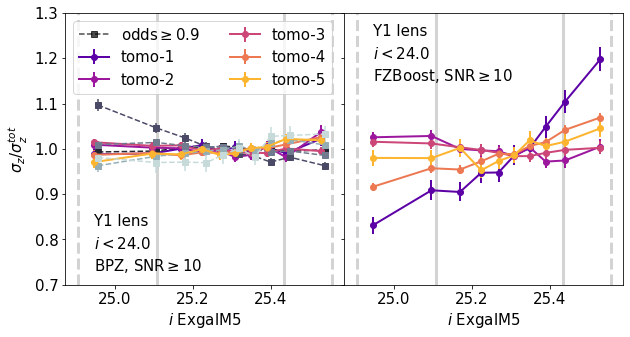

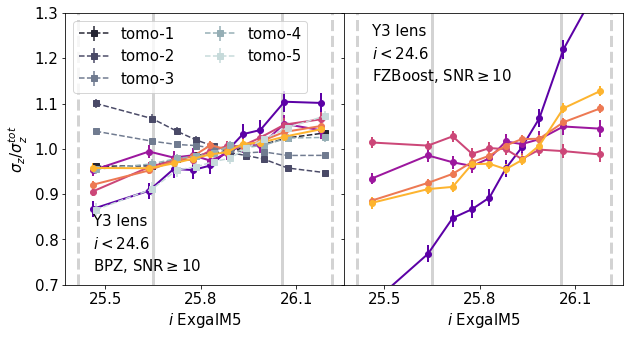

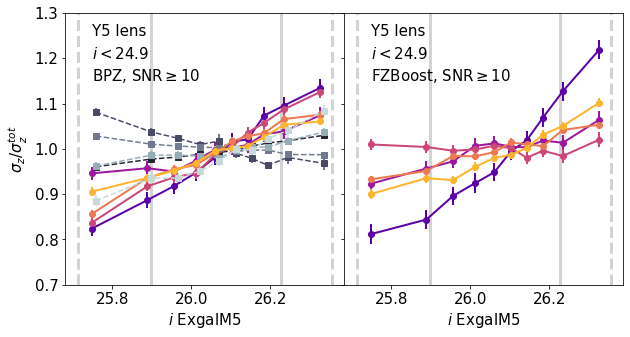

In [103]:
for year in [1,3,5]:
    gold_i = gold_i_10yr - 2.5*np.log10(np.sqrt(10/year))
    gold_i = round(gold_i,1)
    fig,axarr=plt.subplots(1,2,figsize=[10,5],sharex=True,sharey=True)

    # FZB lens
    stats=[packed_stats_lens[year], packed_stats_fzb_lens[year]]
    stats2 = packed_stats_odds_lens[year]

    for ii in range(2):
        plt.sca(axarr[ii])
        # plot 1 and 2 sigma range:
        plt.plot([one_sig_depth[year][0], one_sig_depth[year][0]], [0.7,1.3], color='lightgrey', lw=3)
        plt.plot([one_sig_depth[year][1], one_sig_depth[year][1]], [0.7,1.3], color='lightgrey', lw=3)
        plt.plot([two_sig_depth[year][0], two_sig_depth[year][0]], [0.7,1.3], color='lightgrey',lw=3,ls='--')
        plt.plot([two_sig_depth[year][1], two_sig_depth[year][1]], [0.7,1.3], color='lightgrey',lw=3,ls='--')
        for kk in range(5):
            colorlab = (kk+1)/(5*1.2)
            # BPZ
            sigmaz = stats[ii]["tomo-%d"%(kk+1)]["sigmaz"]
            sigmaztot = stats[ii]["tomo-%d"%(kk+1)]["sigmaztot"]
            plt.errorbar(mean_sys[year], sigmaz[:,0]/sigmaztot, yerr=sigmaz[:,1]/sigmaztot,
                         fmt='o-',color=cmap(colorlab),label=label1[year][kk],lw=2)
            
            if ii==0:
                # BPZ
                sigmaz = stats2["tomo-%d"%(kk+1)]["sigmaz"]
                sigmaztot = stats2["tomo-%d"%(kk+1)]["sigmaztot"]
                plt.errorbar(mean_sys[year]+0.01, sigmaz[:,0]/sigmaztot, yerr=sigmaz[:,1]/sigmaztot,
                             fmt='s--',fillstyle='full',
                             color=cmap2(colorlab),label=label2[year][kk])
    
        plt.xlabel("$i$ ExgalM5")
        plt.ylim([0.7,1.3])
        if ii==0:
            plt.ylabel("$\\sigma_z/\\sigma_z^{tot}$")
        #    plt.yticks([-0.02,-0.01,0,0.01,0.02])
        #plt.xlim([mean_sys[year][0]-0.05, mean_sys[year][-1]+0.05])

    plt.subplots_adjust(wspace=0,hspace=0)
    
    if year in [1,3]:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 0.83, f"Y{year} lens")
        plt.text(mean_sys[year][0], 0.78, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 0.73, "BPZ, SNR$\\geq10$")
    else:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 1.25, f"Y{year} lens")
        plt.text(mean_sys[year][0], 1.2, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 1.15, "BPZ, SNR$\\geq10$")

    plt.sca(axarr[1])
    plt.text(mean_sys[year][0], 1.25, f"Y{year} lens")
    plt.text(mean_sys[year][0], 1.2, f"$i<{gold_i}$")
    plt.text(mean_sys[year][0], 1.15, "FZBoost, SNR$\\geq10$")
    
    if year==1:
        plt.sca(axarr[0])
        plt.plot(mean_sys[year][0], 0.1, 's--',fillstyle="full",
                     color='k',alpha=0.7, label="odds$\\geq 0.9$")
        plt.legend(loc="upper left", ncol=2)
    if year==3:
        plt.sca(axarr[0])
        plt.xticks([25.5,25.8,26.1])
        plt.legend(loc="upper left", ncol=2)
        
    plt.savefig(f"plots/sigmaz-baselinev3.3-Y{year}-bpz-fzb.pdf",bbox_inches="tight")

In [83]:
# load the nzsq files here:

nzsq={}
nzsq_odds={}
nzsq_fzb={}

for year in [1,3,5]:
    savedir = f"/pscratch/sd/q/qhang/roman-rubin-sims/baselinev3.3/y{year}/"
    fname=savedir + f"bpz/test-pz-with-i-band-coadd-Y{year}-snr-10.0-lens-nzsq.pkl"
    nzsq[year]=svf.dump_load(fname)
    
    fname=savedir + f"bpz/test-pz-with-i-band-coadd-Y{year}-snr-10.0-odds-0.9-lens-nzsq.pkl"
    nzsq_odds[year]=svf.dump_load(fname)
    
    fname=savedir + f"fzb/test-pz-with-i-band-coadd-Y{year}-snr-10.0-lens-nzsq.pkl"
    nzsq_fzb[year]=svf.dump_load(fname)

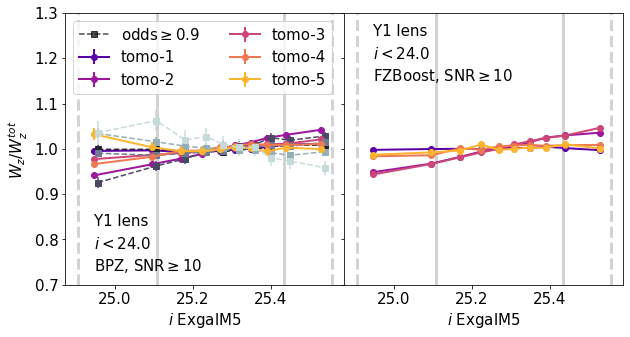

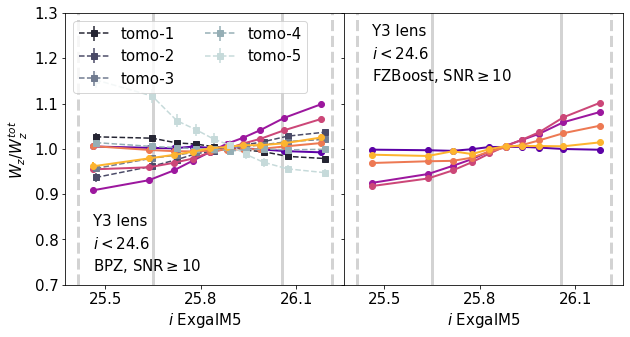

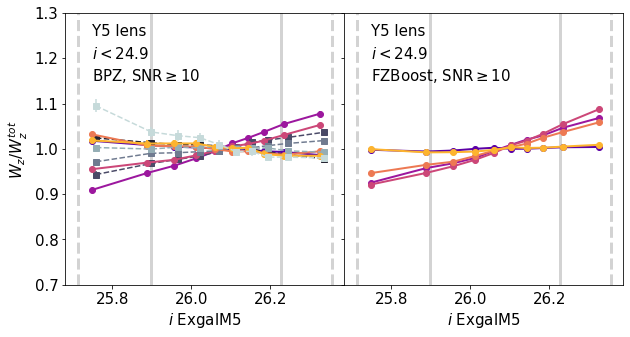

In [102]:
gold_i_10yr=25.3
for year in [1,3,5]:
    gold_i = gold_i_10yr - 2.5*np.log10(np.sqrt(10/year))
    gold_i = round(gold_i,1)
    fig,axarr=plt.subplots(1,2,figsize=[10,5],sharex=True,sharey=True)

    # FZB lens
    stats=[nzsq[year], nzsq_fzb[year]]
    stats2 = nzsq_odds[year]

    for ii in range(2):
        plt.sca(axarr[ii])
        # plot 1 and 2 sigma range:
        plt.plot([one_sig_depth[year][0], one_sig_depth[year][0]], [0.7,1.3], color='lightgrey', lw=3)
        plt.plot([one_sig_depth[year][1], one_sig_depth[year][1]], [0.7,1.3], color='lightgrey', lw=3)
        plt.plot([two_sig_depth[year][0], two_sig_depth[year][0]], [0.7,1.3], color='lightgrey',lw=3,ls='--')
        plt.plot([two_sig_depth[year][1], two_sig_depth[year][1]], [0.7,1.3], color='lightgrey',lw=3,ls='--')
        for kk in range(5):
            colorlab = (kk+1)/(5*1.2)
            # BPZ
            nzsqsplit=np.zeros((nquantiles,2))
            for q in range(nquantiles):
                nzsqsplit[q,:] = stats[ii][0]["q%d"%q]["tomo-%d"%(kk+1)][1]
            nzsqtot = stats[ii][1]["tomo-%d"%(kk+1)]
            plt.errorbar(mean_sys[year], nzsqsplit[:,0]/nzsqtot[0], yerr=nzsqsplit[:,1]/nzsqtot[0],
                         fmt='o-',color=cmap(colorlab),label=label1[year][kk],lw=2)
            
            if ii==0:
                nzsqsplit=np.zeros((nquantiles,2))
                for q in range(nquantiles):
                    nzsqsplit[q,:] = stats2[0]["q%d"%q]["tomo-%d"%(kk+1)][1]
                nzsqtot = stats2[1]["tomo-%d"%(kk+1)]
                plt.errorbar(mean_sys[year]+0.01, nzsqsplit[:,0]/nzsqtot[0], yerr=nzsqsplit[:,1]/nzsqtot[0],
                             fmt='s--',fillstyle='full',color=cmap2(colorlab),label=label2[year][kk])
    
        plt.xlabel("$i$ ExgalM5")
        plt.ylim([0.7,1.3])
        if ii==0:
            plt.ylabel("$W_z/W_z^{tot}$")
        #    plt.yticks([-0.02,-0.01,0,0.01,0.02])
        #plt.xlim([mean_sys[year][0]-0.05, mean_sys[year][-1]+0.05])

    plt.subplots_adjust(wspace=0,hspace=0)
    
    if year in [1,3]:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 0.83, f"Y{year} lens")
        plt.text(mean_sys[year][0], 0.78, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 0.73, "BPZ, SNR$\\geq10$")
    else:
        plt.sca(axarr[0])
        plt.text(mean_sys[year][0], 1.25, f"Y{year} lens")
        plt.text(mean_sys[year][0], 1.2, f"$i<{gold_i}$")
        plt.text(mean_sys[year][0], 1.15, "BPZ, SNR$\\geq10$")

    plt.sca(axarr[1])
    plt.text(mean_sys[year][0], 1.25, f"Y{year} lens")
    plt.text(mean_sys[year][0], 1.2, f"$i<{gold_i}$")
    plt.text(mean_sys[year][0], 1.15, "FZBoost, SNR$\\geq10$")
    
    
    if year==1:
        plt.sca(axarr[0])
        plt.plot(mean_sys[year][0], 0.1, 's--',fillstyle="full",
                     color='k',alpha=0.7, label="odds$\\geq 0.9$")
        plt.legend(loc="upper left", ncol=2)
    if year==3:
        plt.sca(axarr[0])
        plt.xticks([25.5,25.8,26.1])
        plt.legend(loc="upper left", ncol=2)
        
    plt.savefig(f"plots/wz-baselinev3.3-Y{year}-bpz-fzb.pdf",bbox_inches="tight")

In [176]:
nzsqsplit

array([[3.22452537, 0.01734322],
       [3.22927029, 0.0162548 ]])

In [171]:
stats[ii][0]["q%d"%q]["tomo-%d"%(kk+1)][1]

array([3.22927029, 0.0162548 ])

In [177]:
q

1

## 5. 3x2pt data vector

In [2]:
import sacc
import sys
sys.path.insert(0,"/global/homes/q/qhang/desc/lsst_y2_3x2pt_w_txpipe/")
import fourier_theory as ft

In [3]:
def convolve_bandpower(bw, cl_th):
    # convolve with band power:
    usebw=bw[0,:,0,:]
    L=len(cl_th)
    L2=usebw.shape[1]
    if L2>=L: 
        cl_th_binned=np.dot(cl_th, usebw[:,:L].T)
    else:
        cl_th_binned=np.dot(cl_th[:L2], usebw.T)
    return cl_th_binned


In [4]:
# load data:
root="/pscratch/sd/q/qhang/dirac_mock/desc-project285/"
ell=np.loadtxt(root+"effective_ells.txt")
bw=np.load(root+"wb-clgg-binning-20-2000-nell-20-log.npy")
nside=512

### 5.1 galaxy clustering

In [5]:
# compute the scale cuts for clustering:
import pyccl as ccl
h=0.71
omch2=0.1109
ombh2=0.02258
Oc = omch2/h**2
Ob = ombh2/h**2
ns=0.963
sigma8=0.800
As=2e-9*(sigma8/0.75837372)**2
H0=100*h
cosmo_ccl = ccl.Cosmology(Omega_c = Oc, Omega_b = Ob, h = h, sigma8 = sigma8, n_s = ns)

savedir="/pscratch/sd/q/qhang/glass_mock/catalog_lsst_y3-fzb/uniform/"
ellmax=[]
for ii in range(5):
    fname = savedir + f"salmo-measured-NofZ-lens-tomo-{ii}-fzb.dat"
    fin=np.loadtxt(fname)
    meanz=np.sum(fin[:,0]*fin[:,1])/np.sum(fin[:,1])
    chi = ccl.comoving_radial_distance(cosmo_ccl, 1/(1+meanz)) # in Mpc
    chi_mpcoh = chi*0.71
    ellmax.append(0.3*chi_mpcoh-0.5)
print(ellmax)

[265.9807349941148, 403.1155966170281, 539.8220627877016, 653.0018484000559, 756.7049307487994]


In [6]:
clgg_binned_un = np.loadtxt(root+"data-nmt-clgg-512-binning-20-2000.txt")
clgg_binned_vd = np.loadtxt(root+"data-nmt-clgg-vd-512-binning-20-2000.txt")

# covmat
clgg_cov = {}
for ii in range(5):
    fname = root+f"cov-nmt-clgg-tomo-{ii}-512-binning-20-2000.txt"
    clgg_cov[ii]=np.loadtxt(fname)
    
# theory - binned:
clgg_theory = np.loadtxt(root+"clgg-theory-z_bin-nside-512.txt")
# add pixwin and shotnoise
#pshot=np.array([3.13281099e-07, 2.03870247e-07, 2.18472948e-07, 2.16053153e-07, 4.09547021e-07])
pshot=np.array([3.862394178701377e-08, 2.538344765781688e-08, 2.4507395444259033e-08, 
                 2.1342497199973858e-08, 3.357135958745967e-08])
pixwin=hp.pixwin(nside,lmax=3*nside-1)**2
clgg_theory_binned = []
for ii in range(5):
    tmp=(clgg_theory[:,ii]*pixwin)+pshot[ii]
    # binned version:
    clgg_theory_binned.append(convolve_bandpower(bw, tmp))

In [7]:
fsky=0.41963705

In [8]:
# chi2:

#chi2_un =  np.array([ 3.74129198,  8.94220332, 17.3651816,   9.79749752 ,10.93772538])
#chi2_vd = np.array([1.84947251e+01, 1.42044569e+01, 3.53012957e+01, 5.22446061e+02, 1.75781943e+04])
chi2_un = [0.67172197, 1.51221272, 1.12306776, 1.75102764, 1.44587003]
chi2_vd = [3.33587821e+00, 2.23608214e+00, 5.11770279e+00, 1.10823937e+02,
 4.33240790e+03]

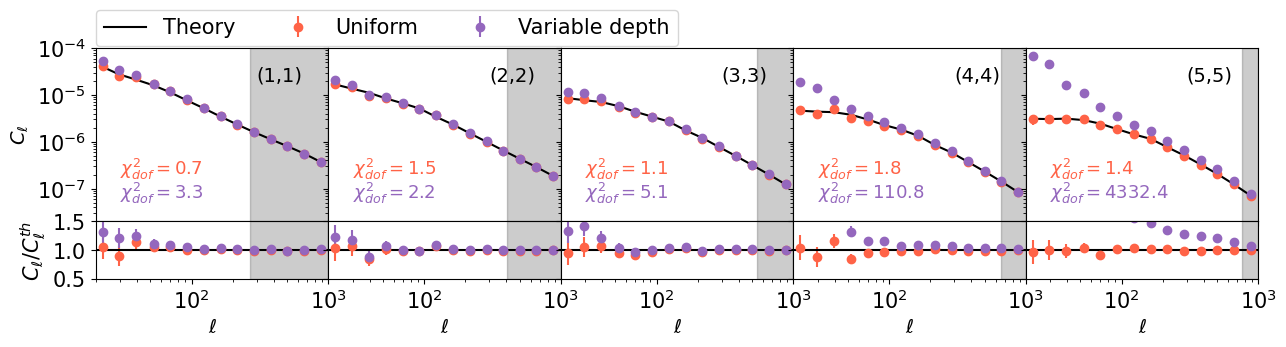

In [9]:
# plot auto-correlations:
fig,axarr=plt.subplots(2,5,figsize=[15,3],sharey="row",sharex=True, 
                       gridspec_kw={'height_ratios': [3, 1]})

for ii in range(5):
    plt.sca(axarr[0,ii])
    plt.yscale("log")
    b1=b2=f"lens_{ii}"
    
    plt.text(300,2e-5,f"({ii+1},{ii+1})",fontsize=14)
    
    yerr=np.sqrt(np.diag(clgg_cov[ii])/fsky)
    plt.errorbar(ell, clgg_binned_un[ii,:]-pshot[ii], yerr=yerr, fmt='o', color="tomato",
                 label='Uniform')
    plt.errorbar(ell, clgg_binned_vd[ii,:]-pshot[ii], yerr=yerr, fmt='o',color="tab:purple",
                 label='Variable depth')
    plt.plot(ell, clgg_theory_binned[ii]-pshot[ii], 'k-',label='Theory')
    
    plt.fill_between([ellmax[ii],1000],[1e-8,1e-8],[1e-4,1e-4],alpha=0.2,color="k")
    plt.ylim([2e-8,1e-4])
    plt.xlim([20,1000])
    chi2txt = "\\chi^2_{dof}"
    plt.text(30,2e-7,f"${chi2txt}={round(chi2_un[ii],1)}$",color="tomato",fontsize=13)
    plt.text(30,6e-8,f"${chi2txt}={round(chi2_vd[ii],1)}$",color="tab:purple",fontsize=13)

    if ii==0:
        plt.legend(ncols=3, loc=[0,1.01])
        plt.ylabel('$C_\\ell$',fontsize=14)

    #plt.ylim([0,2e-5])
    plt.sca(axarr[1,ii])
    plt.xscale("log")
    if ii==0:
        plt.ylabel("$C_\\ell/C^{th}_\\ell$")
        plt.yticks([0.5,1.0,1.5])
        
    plt.errorbar(ell, clgg_binned_un[ii,:]/clgg_theory_binned[ii], 
                 yerr=yerr/clgg_theory_binned[ii], fmt='o', color="tomato",
                 label='Uniform')
    plt.errorbar(ell, clgg_binned_vd[ii,:]/clgg_theory_binned[ii], 
                 yerr=yerr/clgg_theory_binned[ii], fmt='o', color="tab:purple",
                 label='VD')
    
    plt.fill_between([ellmax[ii],1000],[0.5,0.5],[1.5,1.5],alpha=0.2,color="k")
    plt.xlim([20,1000])
    plt.ylim([0.5,1.5])
    plt.xlabel('$\\ell$',fontsize=14)
    plt.plot([20,1000],[1,1],'k-')

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("plots/clgg-y3-fzb-dirac-no-pshot.pdf",bbox_inches="tight")

In [127]:
print(ellmax)

[265.9807349941148, 403.1155966170281, 539.8220627877016, 653.0018484000559, 756.7049307487994]


In [11]:
clgk_binned_un_noisy = np.loadtxt(root+"data-noisy-nmt-clgk-512-binning-20-2000.txt")
clgk_binned_vd_noisy = np.loadtxt(root+"data-noisy-nmt-clgk-vd-512-binning-20-2000.txt")

# covmat
clgk_cov = {}
kk=0
for ii in range(5):
    for jj in range(5):
        if ii>=jj:
            fname = root+f"cov-noisy-nmt-clgk-tomo-{ii}{jj}-512-binning-20-2000.txt"
            clgk_cov[kk]=np.loadtxt(fname)
            kk+=1
            
# theory:
# theory - binned:
clgk_theory = np.loadtxt(root+"clgk-theory-z_bin-nside-512.txt")
# add pixwin and shotnoise
pixwin=hp.pixwin(nside,lmax=3*nside-1)**2
clgk_theory_binned = []
kk=0
for ii in range(5):
    for jj in range(5):
        if ii>=jj:
            tmp=clgk_theory[:,kk]*pixwin
            # binned version:
            clgk_theory_binned.append(convolve_bandpower(bw, tmp))
            kk+=1

In [12]:
#chi2_un = np.array([10.31974085,  5.29817693,  2.49175325,  4.05294819,  1.83801124,  7.47852664,
#  6.48373708,  4.50263263,  7.41058357,  5.60236187,  5.20812531,  6.94521519,
# 11.01100928,  7.01550089,  4.10261223])
#chi2_vd = np.array([10.43165459,  5.23746823,  2.22957558,  3.50548158,  2.96717154,  5.59806231,
#  6.7906499,   8.48154591,  8.26444215, 11.62749337,  5.83075549,  7.7357386,
# 12.04894611,  9.21055894, 29.92582617])

chi2_un = [1.81094791, 0.71511284, 0.67442011, 0.56065567, 0.36914063, 1.43800893,
 0.99651024, 0.73801781, 1.2573632,  0.95569388, 0.8102688,  1.08394001,
 1.32633572, 1.31349508, 1.07555456]
chi2_vd =[1.49008267, 1.04918043, 1.25096502, 0.53940818, 0.53990967, 1.09950722,
 1.0105774,  0.76717776, 1.09499104, 2.2099983,  0.99420143, 1.21138603,
 1.65452129, 1.5024796,  5.72673693]

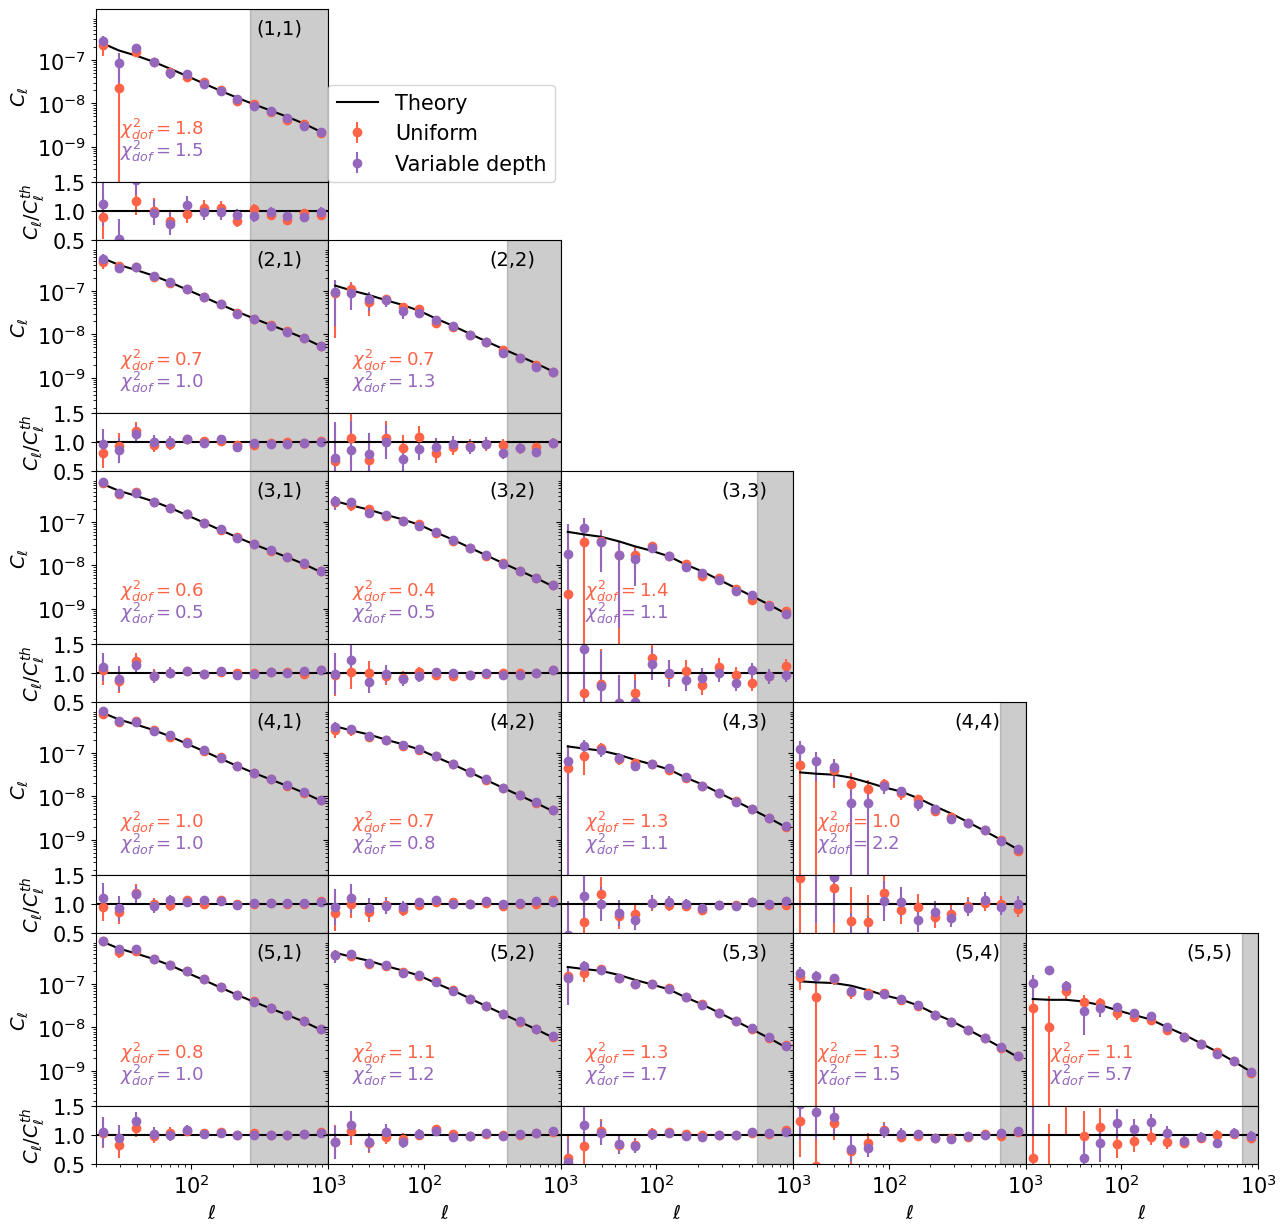

In [13]:
# plot all correlations
fig,axarr=plt.subplots(10,5,figsize=[15,15],sharex=True, sharey="row",
                      gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1, 3, 1, 3, 1]})
kk=0
chi2txt = "\\chi^2_{dof}"
for ii in range(5):
    for jj in range(5):
        
        if ii<jj:
            axarr[ii*2,jj].axis("off")
            axarr[ii*2+1,jj].axis("off")
        
        if ii>=jj:
            plt.sca(axarr[ii*2,jj])
            plt.yscale("log")
            b1=f"source_{ii}"
            b2=f"lens_{jj}"
            
            plt.text(300, 4e-7, f"({ii+1},{jj+1})",fontsize=14)
            
            yerr=np.sqrt(np.diag(clgk_cov[kk])/fsky)
            plt.errorbar(ell,clgk_binned_un_noisy[kk,:],yerr=yerr, fmt='o',label='Uniform',
                        color="tomato",)
            plt.errorbar(ell,clgk_binned_vd_noisy[kk,:],yerr=yerr, fmt='o',label='Variable depth',
                        color="tab:purple",)
            plt.plot(ell, clgk_theory_binned[kk],'k-', label="Theory")
            
            if jj==0:
                plt.ylabel('$C_\\ell$',fontsize=14)
            plt.xscale("log")
            plt.xlim([20,1000])
            plt.ylim([1.5e-10, 1.5e-6])
            plt.yticks([1e-9,1e-8,1e-7])

            if ii==0 and jj==0:
                plt.legend(loc=[1,0])
            plt.fill_between([ellmax[jj],1000],[1.5e-10,1.5e-10],[1.5e-6,1.5e-6],
                             alpha=0.2,color="k")
            plt.text(30,2e-9,f"${chi2txt}={round(chi2_un[kk],1)}$",color="tomato",fontsize=13)
            plt.text(30,6e-10,f"${chi2txt}={round(chi2_vd[kk],1)}$",color="tab:purple",fontsize=13)
                
            plt.sca(axarr[ii*2+1,jj])
            plt.yscale("linear")
            plt.errorbar(ell, clgk_binned_un_noisy[kk,:]/clgk_theory_binned[kk],
                         yerr=yerr/clgk_theory_binned[kk], fmt='o', color="tomato",)
            plt.errorbar(ell, clgk_binned_vd_noisy[kk,:]/clgk_theory_binned[kk], 
                         yerr=yerr/clgk_theory_binned[kk], fmt='o',color="tab:purple")
            plt.ylim([0.5,1.5])
            plt.plot([20,1000],[1,1],'k-')
            plt.yticks([0.5,1,1.5])
            if ii==4:
                plt.xlabel('$\\ell$',fontsize=14)
            if jj==0:
                plt.ylabel("$C_\\ell/C^{th}_\\ell$",fontsize=14)
            plt.fill_between([ellmax[jj],1000],[0.5,0.5],[1.5,1.5],alpha=0.2,color="k")    
            
            kk+=1
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("plots/clge-y3-fzb-dirac.pdf",bbox_inches="tight")

In [14]:
clkk_binned_un_noisy = np.loadtxt(root+"data-noisy-nmt-clkk-512-binning-20-2000-shapeN-Gaussian.txt")
clkk_binned_vd_noisy = np.loadtxt(root+"data-noisy-nmt-clkk-vd-512-binning-20-2000.txt")

# covmat
clkk_cov = {}
kk=0
for ii in range(5):
    for jj in range(5):
        if ii>=jj:
            fname = root+f"cov-noisy-nmt-clkk-tomo-{ii}{jj}-512-binning-20-2000.txt"
            clkk_cov[kk]=np.loadtxt(fname)
            kk+=1
            
# theory:
# theory - binned:
clkk_theory = np.loadtxt(root+"clkk-theory-nside-512.txt")
# add pixwin and shotnoise
pixwin=hp.pixwin(nside,lmax=3*nside-1)**2
pshape = np.array([3.7982262757815385e-09, 3.691708135570749e-09, 3.5761122650727328e-09, 
                   3.532698922231069e-09 ,3.406168937618163e-09])
clkk_theory_binned = []
kk=0
for ii in range(5):
    for jj in range(5):
        if ii>=jj:
            tmp=clkk_theory[:,kk]*pixwin
            if ii==jj:
                tmp += pshape[ii] 
            # binned version:
            clkk_theory_binned.append(convolve_bandpower(bw, tmp))
            kk+=1

In [15]:
#chi2_un=np.array([ 6.95403153, 12.5970231,  15.29063663,  6.64446047,  9.31018446, 13.91372369,
#  7.91069087, 10.40339652, 11.83357564, 12.48314484,  9.12911141, 10.70653628,
# 12.55310503, 16.26083665, 14.9376039 ])
#chi2_vd=np.array([11.09493922,  9.05349405, 14.14750346,  7.02808418,  4.63440061,  6.40685122,
#  5.77961133,  4.53961149,  4.87650406, 10.26516325,  9.02850336,  6.63008741,
#  8.96926072, 11.17436186, 15.67325152])

chi2_un=[1.6435075,  0.65711953, 2.53910623, 0.81653069, 1.2837246,  1.87382506,
 1.10439869, 1.68680749, 0.68322391, 2.12077205, 1.23452329, 1.00986168,
 0.8700531,  1.49252597, 3.02378539]
chi2_vd=[1.73124468, 1.42123005, 1.8926936,  0.99512734, 0.99106301, 1.21191861,
 1.17970896, 0.76731326, 0.67783997, 1.57817377, 1.78369407, 1.25290539,
 1.14592567, 1.21137089, 3.28530139]

In [16]:
#pshape1=np.array([3.79822628e-09, 3.69170814e-09, 3.61187339e-09, 3.56802591e-09,
# 3.50835401e-09])
#pshape2=np.array([3.83620854e-09, 3.69170814e-09, 3.61187339e-09, 3.60335290e-09,
# 3.71272414e-09])
pshot_un_factor=np.array([1.00321869569435, 1.0028174467489208, 1.0111459061170944, 
                          1.003715038262211, 1.0200403401676303])
pshot_vd_factor=np.array([1.0124216710114762, 1.0048593496923712, 1.011267536780117, 
                          1.0160637169674085, 1.0880570210090108])
pshape1 = pshape*pshot_un_factor
pshape2 = pshape*pshot_vd_factor

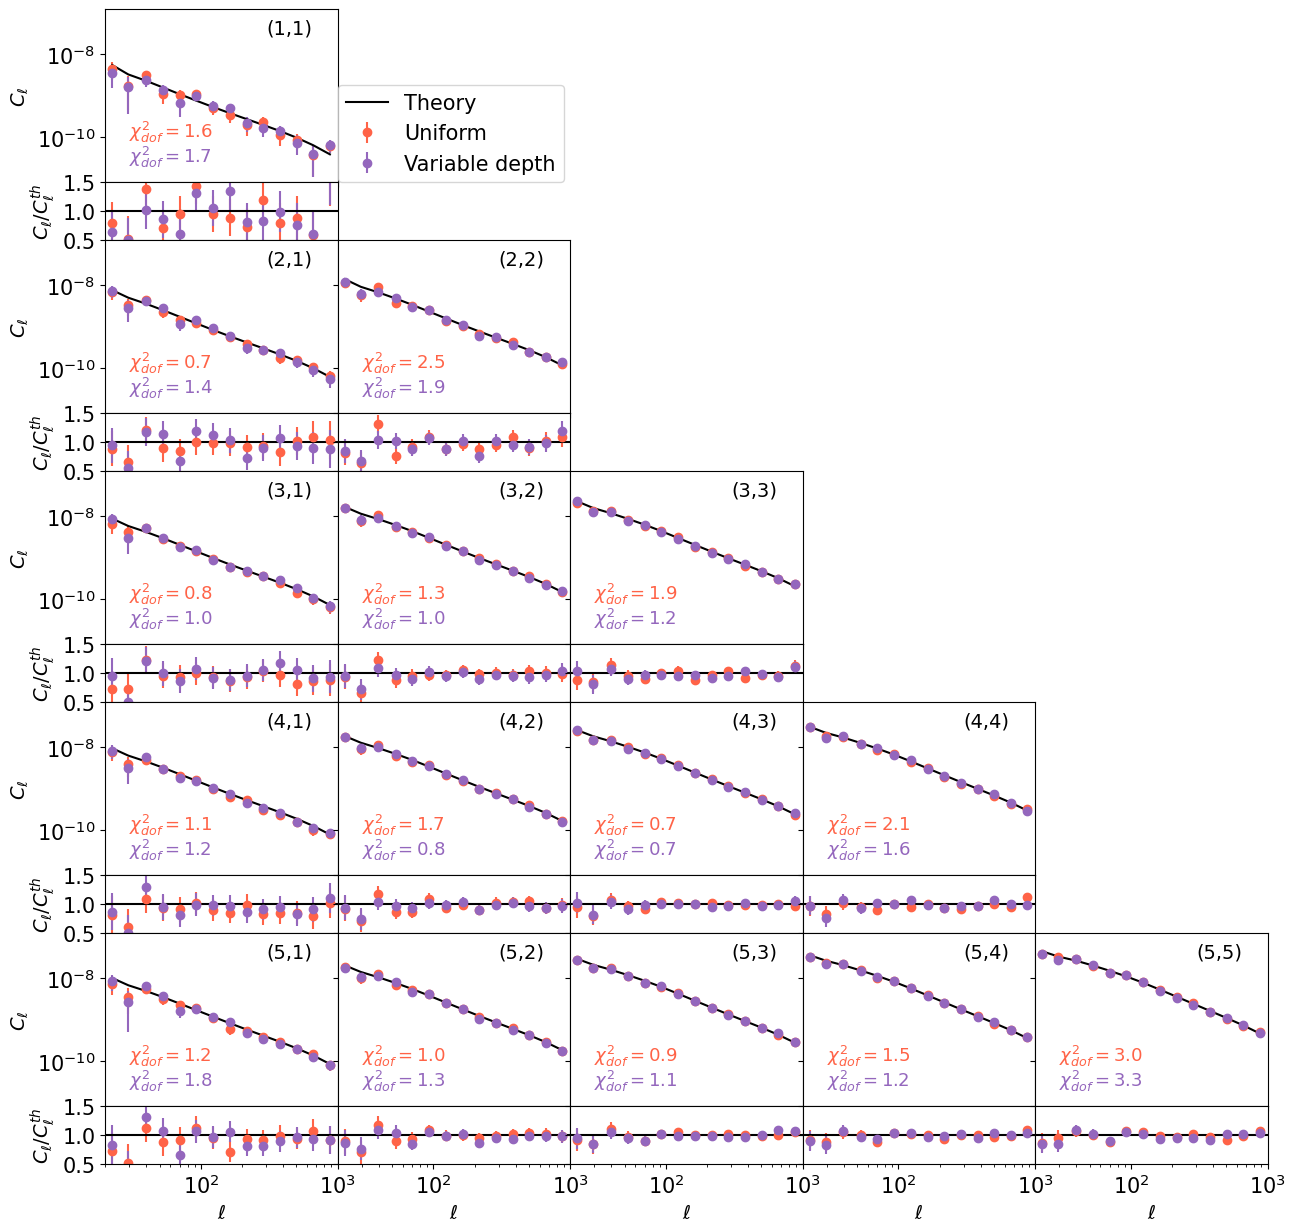

In [17]:
# plot all correlations
fig,axarr=plt.subplots(10,5,figsize=[15,15],sharex=True, sharey="row",
                      gridspec_kw={'height_ratios': [3, 1, 3, 1, 3, 1, 3, 1, 3, 1]})

kk=0
for ii in range(5):
    for jj in range(5):
        
        if ii<jj:
            axarr[ii*2,jj].axis("off")
            axarr[ii*2+1,jj].axis("off")
        
        if ii>=jj:
            plt.sca(axarr[ii*2,jj])
            plt.yscale("log")
            
            plt.text(300, 3e-8, f"({ii+1},{jj+1})",fontsize=14)
            plt.ylim([0.8e-11, 1.2e-7])
            
            yerr=np.sqrt(np.diag(clkk_cov[kk])/fsky)
            
            if ii==jj:
                sub = pshape[ii]
                sub1 = pshape1[ii]
                sub2 = pshape2[ii]
            else:
                sub = 0
                sub1 = 0
                sub2 = 0
            
            plt.errorbar(ell,clkk_binned_un_noisy[kk,:]-sub1,yerr=yerr, fmt='o',color="tomato",
                         label='Uniform')
            plt.errorbar(ell,clkk_binned_vd_noisy[kk,:]-sub2,yerr=yerr, fmt='o',color="tab:purple",
                         label='Variable depth')
            plt.plot(ell, clkk_theory_binned[kk]-sub,'k-',label='Theory')
            
            plt.xlim([20,1000])
            
            if jj==0:
                plt.ylabel('$C_\\ell$',fontsize=14)
            plt.xscale("log")
            if ii==0 and jj==0:
                plt.legend(loc=[1,0])
            plt.text(30,1e-10,f"${chi2txt}={round(chi2_un[kk],1)}$",color="tomato",fontsize=13)
            plt.text(30,2.5e-11,f"${chi2txt}={round(chi2_vd[kk],1)}$",color="tab:purple",fontsize=13)
                
            plt.sca(axarr[ii*2+1,jj])
            plt.yscale("linear")
            plt.errorbar(ell, (clkk_binned_un_noisy[kk,:]-sub1)/(clkk_theory_binned[kk]-sub), 
                         yerr=yerr/(clkk_theory_binned[kk]-sub), fmt='o', color="tomato",)
            plt.errorbar(ell, (clkk_binned_vd_noisy[kk,:]-sub2)/(clkk_theory_binned[kk]-sub), 
                         yerr=yerr/(clkk_theory_binned[kk]-sub), fmt='o',color="tab:purple")
            plt.ylim([0.5,1.5])
            plt.plot([20,1000],[1,1],'k-')
            plt.yticks([0.5,1,1.5])
            if jj==0:
                plt.ylabel("$C_\\ell/C^{th}_\\ell$",fontsize=14)
            
            if ii==4:
                plt.xlabel('$\\ell$',fontsize=14)
                
            kk+=1
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("plots/clee-y3-fzb-dirac-no-pshape.pdf",bbox_inches="tight")

# noiseless case ratios:

In [18]:
clgg_binned_un = np.loadtxt(root+"data-noiseless-nmt-clgg-512-binning-20-2000.txt")
clgg_binned_vd = np.loadtxt(root+"data-noiseless-nmt-clgg-vd-512-binning-20-2000.txt")
clgg_binned_vd2 = np.loadtxt(root+"data-noiseless-nmt-clgg-vd-nzonly-512-binning-20-2000.txt")

clgk_binned_un = np.loadtxt(root+"data-noiseless-nmt-clgk-512-binning-20-2000.txt")
clgk_binned_vd = np.loadtxt(root+"data-noiseless-nmt-clgk-vd-512-binning-20-2000.txt")
clgk_binned_vd2 = np.loadtxt(root+"data-noiseless-nmt-clgk-vd-nzonly-512-binning-20-2000.txt")

clkk_binned_un = np.loadtxt(root+"data-nmt-clkk-512-binning-20-2000.txt")
clkk_binned_vd = np.loadtxt(root+"data-nmt-clkk-vd-512-binning-20-2000.txt")

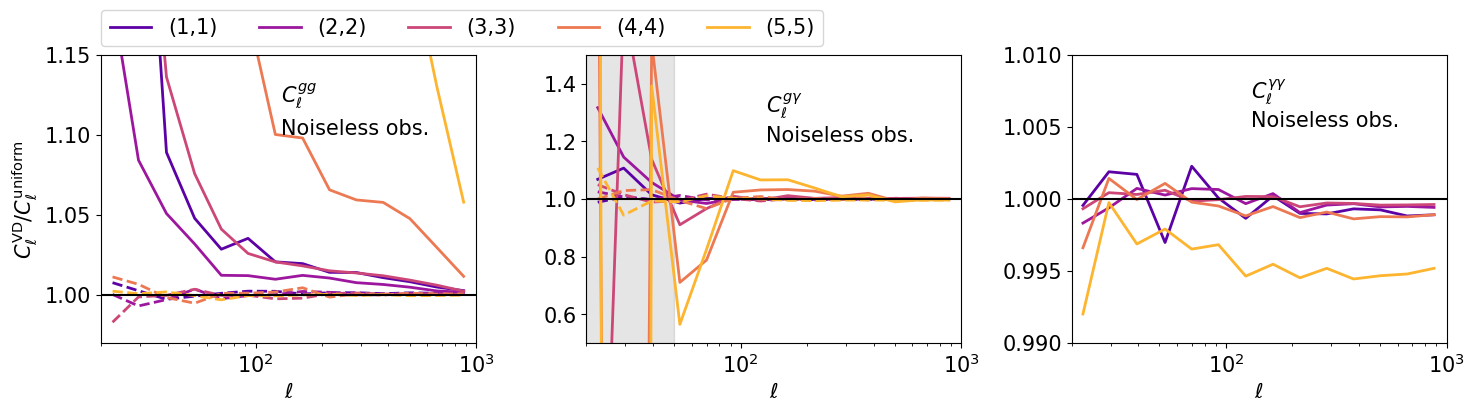

In [19]:
# noise-less cases:
fig,axarr=plt.subplots(1,3,figsize=[15,4],sharex=True)

plt.sca(axarr[0])
for kk in range(5):
    colorlab=(kk+1)/(5*1.2)
    ratio = clgg_binned_vd[kk,:]/clgg_binned_un[kk,:]
    plt.plot(ell, ratio, color=cmap(colorlab), label=f"({kk+1},{kk+1})", lw=2)
    ratio = clgg_binned_vd2[kk,:]/clgg_binned_un[kk,:]
    plt.plot(ell, ratio, color=cmap(colorlab), lw=2, ls='--')
plt.ylim([0.97,1.15])
plt.ylabel("$C_{\\ell}^{\\rm VD}/C_{\\ell}^{\\rm uniform}$")
plt.xlabel("$\\ell$")
plt.plot([20,1000],[1,1],'k-')
plt.text(130, 1.12, "$C_{\\ell}^{gg}$")
plt.text(130, 1.1, "Noiseless obs.")
#plt.yticks([0.99,0.995,1,1.005,1.01])

plt.sca(axarr[1])
for ii,kk in enumerate([0,2,5,9,14]):
    colorlab=(ii+1)/(5*1.2)
    ratio = clgk_binned_vd[kk,:]/clgk_binned_un[kk,:]
    plt.plot(ell, ratio, color=cmap(colorlab),lw=2)
    ratio = clgk_binned_vd2[kk,:]/clgk_binned_un[kk,:]
    plt.plot(ell, ratio, color=cmap(colorlab),lw=2,ls='--')
plt.xlabel("$\\ell$")
plt.ylim([0.5,1.5])
plt.plot([20,1000],[1,1],'k-')
plt.text(130, 1.3, "$C_{\\ell}^{g\\gamma}$")
plt.text(130, 1.2, "Noiseless obs.")
plt.fill_between([20,50],[0.5,0.5],[1.5,1.5],color='k',alpha=0.1)


plt.sca(axarr[2])
for ii,kk in enumerate([0,2,5,9,14]):
#for ii,kk in enumerate([1,4,8,13]):
    colorlab=(ii+1)/(5*1.2)
    ratio = clkk_binned_vd[kk,:]/clkk_binned_un[kk,:]
    #yerr = ratio*np.sqrt((clkk_err[ii]/clkk_binned_vd[kk,:])**2
                        # +(clkk_err[ii]/clkk_binned_un[kk,:])**2)
    #yerr=clkk_err[ii]/(clkk_theory_binned[kk]-pshape[ii])
    plt.plot(ell, ratio, color=cmap(colorlab),lw=2)
plt.xscale("log")
plt.text(130, 1.007, "$C_{\\ell}^{\\gamma\\gamma}$")
plt.text(130, 1.005, "Noiseless obs.")
plt.ylim([0.99,1.01])
plt.xlim([20,1000])
plt.plot([20,1000],[1,1],'k-')
plt.xlabel("$\\ell$")
plt.yticks([0.99,0.995,1,1.005,1.01])

plt.tight_layout()

plt.sca(axarr[0])
plt.legend(ncols=5, loc=[0,1.03])

plt.savefig("plots/noiseless-ratio-3x2pt-y3-fzb-dirac.pdf",bbox_inches="tight")

#### Theory for q0 and q9:

In [20]:
# load these theories:
root="/pscratch/sd/q/qhang/dirac_mock/desc-project285/"
# clgg
clgg_ud= np.loadtxt(root+"clgg-theory-z_bin-nside-512.txt")
clgg_q0= np.loadtxt(root+"clgg-theory-depth-qtl-0-z_bin-nside-512.txt")
clgg_q9= np.loadtxt(root+"clgg-theory-depth-qtl-9-z_bin-nside-512.txt")

# clgk
clgk_ud= np.loadtxt(root+"clgk-theory-z_bin-nside-512.txt")
clgk_q0= np.loadtxt(root+"clgk-theory-depth-qtl-0-z_bin-nside-512.txt")
clgk_q9= np.loadtxt(root+"clgk-theory-depth-qtl-9-z_bin-nside-512.txt")
clgk_q5= np.loadtxt(root+"clgk-theory-depth-qtl-5-z_bin-nside-512.txt")# for sanity check

# clkk
clkk_ud= np.loadtxt(root+"clkk-theory-nside-512.txt")
clkk_q0= np.loadtxt(root+"clkk-theory-depth-qtl-0-nside-512.txt")
clkk_q9= np.loadtxt(root+"clkk-theory-depth-qtl-9-nside-512.txt")

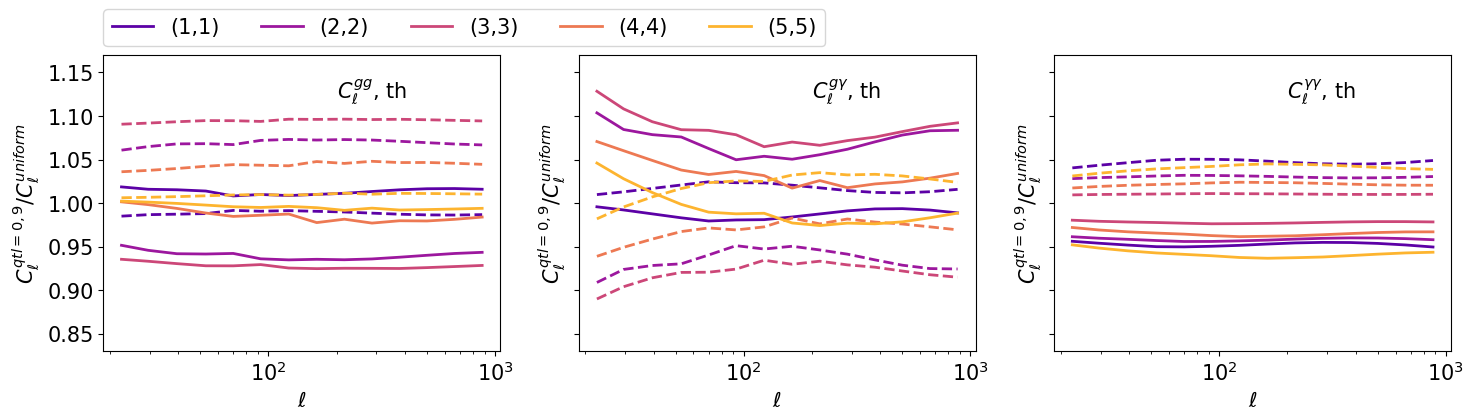

In [21]:
fig,axarr=plt.subplots(1,3,figsize=[15,4],sharex=True,sharey=True)
plt.sca(axarr[0])
for ii in range(5):
    colorlab=(ii+1)/(5*1.2)
    y1=convolve_bandpower(bw, clgg_ud[:,ii])
    y2=convolve_bandpower(bw, clgg_q0[:,ii])
    y3=convolve_bandpower(bw, clgg_q9[:,ii])
    
    plt.plot(ell, y2/y1,ls='-',color=cmap(colorlab),lw=2,label=f"({ii+1},{ii+1})")
    plt.plot(ell, y3/y1,ls='--',color=cmap(colorlab), lw=2)
plt.xscale("log")
plt.xlabel("${\\ell}$")
plt.text(200, 1.12, "$C_{\\ell}^{gg}$, th")
plt.ylim([0.83,1.17])
plt.ylabel("$C_{\\ell}^{qtl=0, 9}/C_{\\ell}^{uniform}$")

plt.sca(axarr[1])
for cc, ii in enumerate([0,2,5,9,14]):
    colorlab=(cc+1)/(5*1.2)
    y1=convolve_bandpower(bw, clgk_ud[:,ii])
    y2=convolve_bandpower(bw, clgk_q0[:,ii])
    y3=convolve_bandpower(bw, clgk_q9[:,ii])
    
    plt.plot(ell, y2/y1,ls='-',color=cmap(colorlab), lw=2)
    plt.plot(ell, y3/y1,ls='--',color=cmap(colorlab), lw=2)
plt.xscale("log")
plt.xlabel("${\\ell}$")
plt.text(200, 1.12, "$C_{\\ell}^{g\gamma}$, th")
plt.ylabel("$C_{\\ell}^{qtl=0, 9}/C_{\\ell}^{uniform}$")

plt.sca(axarr[2])
for cc, ii in enumerate([0,2,5,9,14]):
    colorlab=(cc+1)/(5*1.2)
    y1=convolve_bandpower(bw, clkk_ud[:,ii])
    y2=convolve_bandpower(bw, clkk_q0[:,ii])
    y3=convolve_bandpower(bw, clkk_q9[:,ii])
    
    plt.plot(ell, y2/y1,ls='-',color=cmap(colorlab), lw=2)
    plt.plot(ell, y3/y1,ls='--',color=cmap(colorlab), lw=2)
plt.xscale("log")
plt.xlabel("${\\ell}$")
plt.text(200, 1.12, "$C_{\\ell}^{\gamma\gamma}$, th")
plt.ylabel("$C_{\\ell}^{qtl=0, 9}/C_{\\ell}^{uniform}$")

plt.tight_layout()

plt.sca(axarr[0])
plt.legend(ncols=5, loc=[0,1.03])

plt.savefig("plots/q0-q9-ratio-3x2pt-y3-fzb-dirac.pdf",bbox_inches="tight")